# RevoBank Performance & Customer Analysis

RevoBank is a fictional bank and the datasets are created as part of the Curriculum for [Full Stack Data Analytics Program from RevoU](https://https://revou.co/fsda) in 2023. There is a brief used as the assignment guide in performing data analysis using Python notebook in Google Colab. And the datasets itselves are based on real case study. And this project will showcase my data analysis skills guided by the brief

## Business Background 1

Today is January 31, 2023, and you work as a data analyst at RevoBank, a European bank that provides credit cards to its customers. Your current assignment is within the Card Partnership tribe, which aims to increase the usage of RevoBank credit cards in partnership with various merchants.

One of RevoBank's partners is RevoShop, a well-established e-commerce marketplace company. Over the past 6 months, RevoBank implemented a new promotion exclusively for credit card users. The promotion involves distributing RevoShop vouchers to all RevoBank customers via email or SMS. When users redeem vouchers on eligible transactions, they receive 15 credit card reward points, equivalent to 1.5 euro. There are no limits on the number of transactions a user can redeem, and RevoBank covers the full cost of the promotion.

After running the promotion for 6 months, the Card Partnership Lead at RevoBank wants a better understanding of the spending patterns among RevoShop customers who are RevoBank credit card users. Additionally, they seek to find ways to reduce the cost of the promotion. As a data analyst in the tribe, your tasks are as follows:
* Provide an overview of the promotion program's performance from RevoBank's perspective.
* Identify different segments of RevoBank credit card users who are RevoShop customers.
* Discover business opportunities to customize the rewards program for each customer segment.

**Additional business information**

In the credit card business, banks earn revenue from transactions made at merchants like Revoshop through interchange fees, installment interest, and other sources. For RevoBank, let's assume that every 100 euros spent on marketplace merchants generate 2.4 euros of revenue. This means that the bank earns a margin of 2.4% from the transaction amount.

## Business Background 2


In addition to regular promotions, the RevoBank Card Partnership tribe started a pilot program for the installment or PayLater feature in RevoShop for 3 months between February 2023 and April 2023. This initiative aims to boost credit card usage by allowing customers to convert their e-commerce transactions into fixed installments with a low-interest rate.

The pilot program has shown good results, which has prompted the tribe leader to request an assessment of Project Contact. Project Contact is a plan to contact 30,000 RevoShop customers who have never used the PayLater feature by phone calls and offer them a welcome bonus of 1000 reward points (worth 100 euros) if they activate and start using Pay Later for their transactions.

After discussing with your manager, Mr. Djoko, you have come up with a plan to develop a propensity model that predicts which customers are most likely to use the PayLater feature. You will then use the propensity model to present a benefit-cost analysis related to the proposed Project Contact.

**Project Contact Business process**
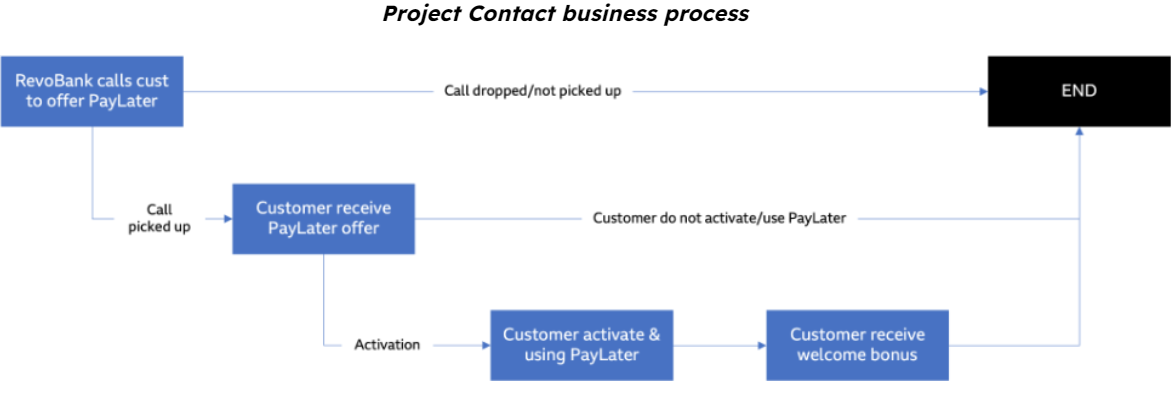

# Project Scope

What we can understood from the brief are:
* Over the past 6 months, RevoBank have new promotion for transactions in RevoShop
* Every eligible transactions, redeem a voucher and get 15 reward points (=1.5 euro)
* At the same time, bank earns 2.4% margin from total transaction amounts
* Over the past 3 months (February - April 2023), RevoBank Card Partnership tribe started a pilot program for installment or Paylater feature in RevoShop
* Project Contact is a plan to contact 30,000 RevoShop customers who have never used the Paylater feature
* If they activate and start using Paylater, they will be given welcome bonus of 1,000 reward points (worth 100 euros)

In this project we are tasked to:
* Review promotion program performance
* Indetify segments of RevoBank credit card users who are RevoShop shoppers
* Identify business opportunities to customize the rewards program in order to reduce the cost of promotion
* Create propensity model of Paylater features
* Deliver top 30,000 prospective users

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
from datetime import datetime
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

# Loading datasets

Both of the datasets provided is given via Google Drive with Bank Promotion Data in .csv format and Paylater Pilot Result data is a Google Spreadsheet file.

We also provided with the Data Dictionary, and can be seen through this [link](https://docs.google.com/spreadsheets/d/1EsqVALuu1n6OI2LnjQaQ-88g7M4p0d9ukOpCEx6Ndnc/edit?usp=sharing)

## Bank Promotion data

Since the bank promotion data is in .csv format and stored within Google Drive, we will download it using gdown

In [ ]:
#importing bank promotion data
url = "https://drive.google.com/file/d/1RK5vnojUtNZH-lbaQVvRiGWwC_l3HWyw/view?usp=drive_link"
output = "bank_data.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1RK5vnojUtNZH-lbaQVvRiGWwC_l3HWyw
To: /content/bank_data.csv
100%|██████████| 16.5M/16.5M [00:00<00:00, 233MB/s]


'bank_data.csv'

In [ ]:
#preview of the table
promo = pd.read_csv("/content/bank_data.csv")
promo.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


## Paylater Pilot Result data

While Paylater Pilot Result data is a Google Spreadsheet file, we can directly import it from Google Drive without download it first.

In [ ]:
#importing paylater pilot result data
sheet_url = "https://docs.google.com/spreadsheets/d/1edwuUq6w9ZbV6x0GbA1EI1PHy5yAl42iOt7ExD0U060/edit?gid=0#gid=0"
sheet_url_csv = sheet_url.replace("/edit?gid=0#gid=", "/export?format=csv&gid=")

#preview of the table
paylater = pd.read_csv(sheet_url_csv)
paylater

,ACCOUNT_ID,PAYLATER_ACTIVE,PAYLATER_TRANSACTIONS,PAYLATER_TOTAL_SALES,PAYLATER_ACTIVATION_DT
0,100000004,0,0,NaN,NaN
1,100000008,0,0,NaN,NaN
2,100000012,0,0,NaN,NaN
3,100000014,0,0,NaN,NaN
4,100000015,0,0,NaN,NaN
...,...,...,...,...,...
112428,101059843,0,0,NaN,NaN
112429,101059857,0,0,NaN,NaN
112430,101059860,0,0,NaN,NaN
112431,101059866,0,0,NaN,NaN


# Data Cleaning & Preparation for Cluster Analysis

Based on the Data Dictionary above, we will only use Bank Promotion table for reviewing the promotion performance and also identifying segments exist within along with business opportunities

We are not required to use Paylater Pilot table for those, instead Paylater Pilot Result table will be used on creating propensity model, for now we will only load it and for the cleaning and feature engineering will be done prior to the modelling process

## Diagnostic for Bank Promotion table

### Info & Missing Value

In [ ]:
#checking the info of each variable exist within the table
promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             112634 non-null  int64  
 1   MCC                    112634 non-null  object 
 2   MERCHANT_NAME          112634 non-null  object 
 3   AVG_TXN_AMT_L6M        112634 non-null  float64
 4   AVG_TXN_AMT_LTM        112634 non-null  float64
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64
 7   TXN_CNT_L6M            112634 non-null  float64
 8   TXN_CNT_LTM            112634 non-null  float64
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64
 11  LAST_TXN_DAY           112634 non-null  float64
 12  CNT_PROMO_L6M          112634 non-null  float64
 13  CNT_PROMO_L12M         112634 non-null  float64
 14  CUST_VALUE_GROUP       112634 non-nu

from .info() we can understood that BIRTH_DATE is formatted as object, which we need to change it as datetime later

In [ ]:
#checking any missing value
promo[promo.isnull().any(axis='columns')]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


We found no missing value within Bank Promotion table. However on the Data Dictionary, it is mentioned that in column AVG_PROMO_TXN_AMT_L6M the missing value is indicated as -1. So, lets check the column

In [ ]:
#checking missing data on AVG_PROMO_TXN_AMT_L6M

promo[promo['AVG_PROMO_TXN_AMT_L6M'] == -1]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
32,100000133,5262-MARKETPLACES,REVOSH MKTPLC,233.3,180.0,-1.0,100.0,4.0,9.0,1.0,...,A,X,0.0,347926.0,0.0,1.0,66.0,1.0,1.0,1985-12-21
82,100000302,5262-MARKETPLACES,REVOSH MKTPLC,250.0,185.6,-1.0,220.0,2.0,44.0,1.0,...,A,X,0.0,0.0,0.0,1.0,124.0,1.0,1.0,1982-02-24
104,100000357,5262-MARKETPLACES,REVOSH MKTPLC,140.0,102.5,-1.0,140.0,2.0,25.0,1.0,...,A,X,0.0,85733.0,67273.0,1.0,106.0,0.0,0.0,1983-08-22
117,100000387,5262-MARKETPLACES,REVOSH MKTPLC,250.0,240.7,-1.0,200.0,2.0,47.0,1.0,...,A,X,0.0,0.0,0.0,1.0,212.0,1.0,0.0,1983-11-21
166,100000591,5262-MARKETPLACES,REVOSH MKTPLC,110.0,79.5,-1.0,110.0,2.0,22.0,1.0,...,A,X,1.0,133906.0,47075.0,1.0,130.0,0.0,0.0,1977-04-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112339,101057451,5262-MARKETPLACES,REVOSHOP,160.0,112.1,-1.0,160.0,2.0,15.0,1.0,...,E,X,0.0,15028.0,46247.0,46.0,124.0,1.0,0.0,1983-12-24
112368,101057690,5262-MARKETPLACES,REVOSHOP,225.0,325.0,-1.0,250.0,3.0,11.0,1.0,...,E,X,1.0,27511.0,30431.0,44.0,102.0,0.0,0.0,1981-04-23
112399,101057929,5262-MARKETPLACES,REVOSHOP,150.0,86.7,-1.0,100.0,3.0,13.0,1.0,...,E,X,1.0,33695.0,41835.0,36.0,106.0,1.0,0.0,1977-10-26
112479,101058836,5262-MARKETPLACES,REVOSHOP,100.0,73.3,-1.0,100.0,4.0,25.0,1.0,...,E,X,0.0,28398.0,0.0,26.0,122.0,1.0,1.0,1981-08-25


The missing value is valid, however it will be an issue since we are going to analyse promo sensitivity later. So, we need to remove the missing value from AVG_PROMO_TXN_AMT_L6M

### Checking unique value

In [ ]:
for i in promo.columns:
  print(id)
  print(promo[i].value_counts())
  print('\n')

<built-in function id>
ACCOUNT_ID
100070125    2
100502294    2
100771163    2
100376790    2
100950065    2
            ..
100356812    1
100356810    1
100356795    1
100356780    1
101059869    1
Name: count, Length: 112433, dtype: int64


<built-in function id>
MCC
5262-MARKETPLACES         112633
5311-DEPARTMENT STORES         1
Name: count, dtype: int64


<built-in function id>
MERCHANT_NAME
REVOSHOP           91168
REVOSH MKTPLC      19965
TOKTOKLIVE          1500
EL CORTE INGLES        1
Name: count, dtype: int64


<built-in function id>
AVG_TXN_AMT_L6M
100.0    12373
150.0     4245
50.0      3794
110.0     3533
120.0     2970
         ...  
208.8        1
540.0        1
302.5        1
26.3         1
397.5        1
Name: count, Length: 1033, dtype: int64


<built-in function id>
AVG_TXN_AMT_LTM
100.0    855
50.0     699
90.0     638
80.0     636
70.0     578
        ... 
575.0      1
362.5      1
215.6      1
296.5      1
30.2       1
Name: count, Length: 2353, dtype: int64


<

Here we can see another value issue within the data such as:
* There are some duplicated ACCOUNT_ID
* Based on Data Dictionary, MCC column should only contains "MCC 5262 - MARKETPLACES" value. However we also find 1 entry with "5311-DEPARTMENT STORES"
* There are Both REVOSHOP and REVOSH MKTPLC, which also based on the Data Dictionary refers to the same one
* Other Merchant named TOKTOKLIVE & EL CORTE INGLES

### Duplicated Values

We need to further diagnosing the duplicated value exist within all columns in the table

In [ ]:
promo[promo.duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


Yet we find no duplicated data exist. And lets deep dive specifically into duplicated ACCOUNT_ID that we found before

In [ ]:
promo[promo['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
169,100000600,5262-MARKETPLACES,TOKTOKLIVE,250.0,131.7,250.0,100.0,2.0,25.0,2.0,...,A,X,1.0,75705.0,48865.0,1.0,129.0,1.0,0.0,1988-05-16
1836,100017966,5262-MARKETPLACES,REVOSH MKTPLC,150.0,78.8,150.0,100.0,3.0,17.0,2.0,...,B,X,1.0,163791.0,87214.0,23.0,92.0,0.0,0.0,1985-02-11
1890,100018465,5262-MARKETPLACES,TOKTOKLIVE,88.0,78.9,86.7,100.0,4.0,17.0,2.0,...,B,X,1.0,64423.0,47589.0,20.0,102.0,1.0,1.0,1972-10-15
3080,100033332,5262-MARKETPLACES,REVOSH MKTPLC,122.5,245.6,50.0,160.0,4.0,21.0,1.0,...,B,X,1.0,227497.0,0.0,24.0,127.0,0.0,1.0,1983-04-21
3653,100038831,5262-MARKETPLACES,TOKTOKLIVE,150.0,206.4,150.0,200.0,2.0,11.0,2.0,...,A,X,1.0,102884.0,72887.0,25.0,105.0,0.0,0.0,1986-11-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110711,101044177,5262-MARKETPLACES,TOKTOKLIVE,100.0,85.2,100.0,100.0,4.0,22.0,3.0,...,D,X,1.0,68891.0,57264.0,39.0,127.0,0.0,0.0,1987-02-26
110833,101045135,5262-MARKETPLACES,REVOSHOP,100.0,104.3,100.0,100.0,2.0,13.0,2.0,...,D,X,0.0,71314.0,0.0,31.0,51.0,0.0,1.0,1990-02-19
110857,101045627,5262-MARKETPLACES,REVOSHOP,57.3,56.2,50.0,50.0,11.0,34.0,4.0,...,E,X,1.0,53316.0,39696.0,38.0,91.0,0.0,0.0,1987-07-23
110878,101045690,5262-MARKETPLACES,TOKTOKLIVE,106.7,98.8,100.0,130.0,2.0,23.0,1.0,...,E,X,0.0,26290.0,36366.0,36.0,126.0,1.0,0.0,1980-08-18


And there are 201 duplicated ACCOUNT_ID detected here

If we look closely, there might be some ACCOUNT_ID that somehow has different combination with other categorical columns.

There are only 2 categorical column ini this table, MCC and MERCHANT_NAME. And since the issue is on Duplicated ACCOUNT_ID and obviously the MCC value should only has 1 unique value, lets check how many ACCOUNT_ID that has more than one MERCHANT_NAME since it is the most possible way that we can find another anomalies

In [ ]:
account_merchant_counts = promo.groupby("ACCOUNT_ID")["MERCHANT_NAME"].nunique()
duplicated_accounts = account_merchant_counts[account_merchant_counts > 1]

number = 0
for account in duplicated_accounts.index:
  merchants = promo[promo["ACCOUNT_ID"] == account]["MERCHANT_NAME"].unique()
  number += 1
  print(f"{number}. Account ID: {account}, Merchants: {', '.join(merchants)}")


1. Account ID: 100000600, Merchants: REVOSH MKTPLC, TOKTOKLIVE
2. Account ID: 100017966, Merchants: TOKTOKLIVE, REVOSH MKTPLC
3. Account ID: 100018465, Merchants: REVOSH MKTPLC, TOKTOKLIVE
4. Account ID: 100033332, Merchants: TOKTOKLIVE, REVOSH MKTPLC
5. Account ID: 100038831, Merchants: REVOSH MKTPLC, TOKTOKLIVE
6. Account ID: 100040745, Merchants: REVOSH MKTPLC, TOKTOKLIVE
7. Account ID: 100045055, Merchants: REVOSH MKTPLC, TOKTOKLIVE
8. Account ID: 100053956, Merchants: TOKTOKLIVE, REVOSH MKTPLC
9. Account ID: 100056390, Merchants: TOKTOKLIVE, REVOSH MKTPLC
10. Account ID: 100060041, Merchants: TOKTOKLIVE, REVOSH MKTPLC
11. Account ID: 100061741, Merchants: REVOSH MKTPLC, TOKTOKLIVE
12. Account ID: 100062396, Merchants: TOKTOKLIVE, REVOSH MKTPLC
13. Account ID: 100070125, Merchants: TOKTOKLIVE, REVOSH MKTPLC
14. Account ID: 100080344, Merchants: REVOSH MKTPLC, TOKTOKLIVE
15. Account ID: 100096014, Merchants: TOKTOKLIVE, REVOSH MKTPLC
16. Account ID: 100106799, Merchants: REVOSH MKTP

From here, we can understood that 201 duplicated ACCOUNT_ID that we detect before has 2 MERCHANTS_NAME in the datasets. Which with this findings, we might want to delete the duplicated ACCOUNT_ID with TOKTOKLIVE so it will be relevant with the scope of analysis and that each rows is unique per account id

### Summary of the diagnostic

Issues that we found are:
* BIRTH_DATE is still considered as object
* There are missing value in AVG_PROMO_TXN_AMT_L6M indicated with "-1"
* MCC should only contains "MCC 5262 - MARKETPLACES", however "MCC 5311 - DEPARTMENT STORES" also exist within the column
* There are some duplicated ACCOUNT_ID, which most has 2 MERCHANT_NAME
* There are 4 merchants in MERCHANT_NAME
* MERCHANT_NAME "REVOSHOP" and "REVOSH MKTPLC" are referring to RevoShop
* Other merchant name also exist, such as "TOKTOKLIVE" and "EL CORTE INGLES"

## Treating Data Anomalies

What we will do based on the summary of the diagnostic are:

1. Changing BIRTH_DATE datatype into Datetime
2. Remove missing value in AVG_PROMO_TXN_AMT_L6M (that indicated with "-1") from the dataset since it will not be useful in the analysis
3. Remove "MCC 5311 - DEPARTMENT STORES" in MCC column, as as the Data Dictionary intended and since it will not be relevant with the analysis
4. Remove "TOKTOKLIVE" and "EL CORTE INGLES" from data since it is not relevant with our analysis
5. in MERCHANT_NAME, Replace "REVOSH MKTPLC" to "REVOSHOP" as the Data Dictionary intended
6. Remove any duplicated ACCOUNT_ID that has duplication MERCHANT_NAME with TOKTOKLIVE, applying tidy principle to have 1 unique account per row

### Changing BIRTH_DATE datatype

In [ ]:
df = promo.copy()
df['BIRTH_DATE'] = pd.to_datetime(df['BIRTH_DATE'], format='%Y-%m-%d')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             112634 non-null  int64         
 1   MCC                    112634 non-null  object        
 2   MERCHANT_NAME          112634 non-null  object        
 3   AVG_TXN_AMT_L6M        112634 non-null  float64       
 4   AVG_TXN_AMT_LTM        112634 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  112634 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  112634 non-null  float64       
 7   TXN_CNT_L6M            112634 non-null  float64       
 8   TXN_CNT_LTM            112634 non-null  float64       
 9   PROMO_TXN_CNT_L6M      112634 non-null  float64       
 10  PROMO_TXN_CNT_LTM      112634 non-null  float64       
 11  LAST_TXN_DAY           112634 non-null  float64       
 12  CNT_PROMO_L6M          112634 non-null  floa

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


### Remove missing value indicated by AVG_PROMO_TXN_AMT_L6M == -1

In [ ]:
df = df[~(df['AVG_PROMO_TXN_AMT_L6M'] == -1)]
df.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSH MKTPLC,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSH MKTPLC,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSH MKTPLC,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSH MKTPLC,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSH MKTPLC,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21


### Remove irrelevant MCC

In [ ]:
df = df[~(df['MCC'] == "5311-DEPARTMENT STORES")]
df['MCC'].value_counts()

,count
MCC,
5262-MARKETPLACES,109117


### Remove irrelevant Merchants

In [ ]:
#removing TOKTOKLIVE and EL CORTE INGLES
df = df[~(df['MERCHANT_NAME'].isin(['TOKTOKLIVE', 'EL CORTE INGLES']))]
df['MERCHANT_NAME'].value_counts()

,count
MERCHANT_NAME,
REVOSHOP,88319
REVOSH MKTPLC,19339


### Replace merchants name

In [ ]:
df['MERCHANT_NAME'] = df['MERCHANT_NAME'].replace('REVOSH MKTPLC', 'REVOSHOP')
df['MERCHANT_NAME'].value_counts()

,count
MERCHANT_NAME,
REVOSHOP,107658


### Remove duplicated ACCOUNT_ID

In [ ]:
df[df.duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df[df['ACCOUNT_ID'].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


In [ ]:
df[df[['ACCOUNT_ID','MERCHANT_NAME']].duplicated()]

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE


Since no more duplicates left after we cleaned "TOKTOKLIVE" in MERCHANT_NAME, we will proceed to check once again as a precautions

In [ ]:
df = df.drop_duplicates()
df

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,CUST_VALUE_GROUP,MAPP_ACTIVE_GROUP,HOMEOWNER_STATUS,HOME_VALUE,PROXY_INCOME,PCT_INCOME_RETIREMENT,MOB,FLAG_FEMALE,PROMO_CHANNEL,BIRTH_DATE
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,A,X,0.0,90587.0,59785.0,32.0,123.0,1.0,0.0,1975-12-17
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,A,X,0.0,65814.0,32597.0,34.0,109.0,1.0,0.0,1991-12-27
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,A,X,0.0,42583.0,0.0,1.0,89.0,0.0,0.0,1970-03-22
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,A,X,0.0,61176.0,0.0,0.0,86.0,1.0,1.0,1983-11-26
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,A,X,0.0,44525.0,42253.0,22.0,124.0,1.0,0.0,1989-10-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112628,101059832,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,2.0,12.0,2.0,...,E,X,0.0,47708.0,0.0,48.0,124.0,0.0,1.0,1979-05-24
112629,101059843,5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,3.0,22.0,1.0,...,E,Y,0.0,27087.0,35533.0,33.0,68.0,0.0,0.0,1993-07-14
112630,101059857,5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,7.0,28.0,3.0,...,E,Y,0.0,26302.0,0.0,27.0,125.0,0.0,1.0,1980-02-19
112631,101059860,5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,3.0,23.0,2.0,...,E,Y,1.0,70105.0,41249.0,63.0,116.0,1.0,0.0,1986-12-29


## Promo-Sensitive Customers

In this project, as briefly mention on previous steps, is required to indentify promo-senstive customers. Which on the original brief of this project is considered by using promotion in more than 50% of their total transactions amount. There is no further detailed direction or reference on how to calculate it, other than this. So, we will try to identify which ACCOUNT_ID is promo-sensitive based on the ratio between the amount of promotion transactions and total transactions amount

Another issue that can be addressed is there are lifetime value and 6-months value of the related columns. And since there are no clear direction, we will count and identify for both

In [ ]:
df2 = df.copy()

### Promo-sensitive on Lifetime basis

In [ ]:
# Calculate total sales with and without promo and its ratio
df2['TOTAL_SALES_LTM'] = df2['AVG_TXN_AMT_LTM'] * df2['TXN_CNT_LTM']
df2['TOTAL_SALES_PROMO_LTM'] = df2['AVG_PROMO_TXN_AMT_LTM'] * df2['PROMO_TXN_CNT_LTM']
df2['RATIO_SALES_PROMO_LTM'] = df2['TOTAL_SALES_PROMO_LTM'] / df2['TOTAL_SALES_LTM']

# Create a promo-sensitive categorization on the lifetime basis
df2.loc[(df2['RATIO_SALES_PROMO_LTM'] > 0.5), 'PROMO_SENSITIVE_LTM'] = 1
df2.loc[(df2['RATIO_SALES_PROMO_LTM'] <= 0.5), 'PROMO_SENSITIVE_LTM'] = 0

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107658 entries, 0 to 112632
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  int64         
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  float64       
 12  CNT_PROMO_L6M          107658 non-null  float64  

### Promo-senstive on L6M basis

In [ ]:
# Calculate total sales with and without promo and its ratio
df2['TOTAL_SALES_L6M'] = df2['AVG_TXN_AMT_L6M'] * df2['TXN_CNT_L6M']
df2['TOTAL_SALES_PROMO_L6M'] = df2['AVG_PROMO_TXN_AMT_L6M'] * df2['PROMO_TXN_CNT_L6M']
df2['RATIO_SALES_PROMO_L6M'] = df2['TOTAL_SALES_PROMO_L6M'] / df2['TOTAL_SALES_L6M']

# Create a promo-sensitive categorization on the L6M basis
df2.loc[(df2['RATIO_SALES_PROMO_L6M'] > 0.5), 'PROMO_SENSITIVE_L6M'] = 1
df2.loc[(df2['RATIO_SALES_PROMO_L6M'] <= 0.5), 'PROMO_SENSITIVE_L6M'] = 0

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107658 entries, 0 to 112632
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  int64         
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  float64       
 12  CNT_PROMO_L6M          107658 non-null  float64  

### Summary

In [ ]:
print(df2['PROMO_SENSITIVE_LTM'].value_counts())
print('\n')
print(df2['PROMO_SENSITIVE_L6M'].value_counts())

PROMO_SENSITIVE_LTM
1.0    73461
0.0    34197
Name: count, dtype: int64


PROMO_SENSITIVE_L6M
1.0    72091
0.0    35567
Name: count, dtype: int64


From here, what we can understood is that there is a decrease in promo-sensitive customer in the last 2 months. Because the number is lower than the lifetime value counts (73,461 LTM : 72,091 L6M)

And further elaboration can be seen below

In [ ]:
df2[['PROMO_SENSITIVE_LTM','PROMO_SENSITIVE_L6M']].value_counts()

PROMO_SENSITIVE_LTM  PROMO_SENSITIVE_L6M
1.0                  1.0                    52811
                     0.0                    20650
0.0                  1.0                    19280
                     0.0                    14917
Name: count, dtype: int64

We can conclude that there are customers who in a lifetime basis is still considered as promo-sensitive. However in the last 6 months has not been promo-sensitive

The same thing also can be observed for customers who are not being promo-sensitive on the lifetime basis, has become promo-sensitive in the last 6 months

In [ ]:
# Lets save the DataFrame for the next Propensity model

promo_model = df2.copy()

# Exploratory Data Analysis

In this section we will try to explore insights that exist within the cleaned dataset and we will try to answer some interesting questions from the original brief

## 1) Descriptive Statistics key insights

### How many RevoShop Customers that we have from the data?

In [ ]:
# Count unique ACCOUNT_ID as from the data
x = df2['ACCOUNT_ID'].nunique()
print(f"total account id within the dataset are {x} ids")

total account id within the dataset are 107658 ids


We have 107,658 customers. Identically the same number as total rows. This is because we previously cleaned the datasets so that each rows are unique account ids on the Bank Promotion table

### What are the customer demographics in the dataset?

**Age**

In [ ]:
# we will try to count the age of each customer from the current date of January 31st 2023
# as for the context, timedelta is not supporting "M" and "Y" format, which we choose to manually input thetimedelta of a year as 365.25 (0.25 is to account leap years)

df2['age'] = (datetime(year=2023, month=1, day=31) - df2['BIRTH_DATE']).dt.days / 365.25
df2[['BIRTH_DATE','age']].head()

,BIRTH_DATE,age
0,1975-12-17,47.123888
1,1991-12-27,31.096509
2,1970-03-22,52.862423
3,1983-11-26,39.181383
4,1989-10-21,33.278576


In [ ]:
# trying to group the age for upcoming age distribution

max_age = df2['age'].max()
min_age = df2['age'].min()

df2['age_group'] = pd.cut(df2['age'], [min_age, 20, 30, 40, 50, 60, max_age], include_lowest=True)
df2.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,TOTAL_SALES_LTM,TOTAL_SALES_PROMO_LTM,RATIO_SALES_PROMO_LTM,PROMO_SENSITIVE_LTM,TOTAL_SALES_L6M,TOTAL_SALES_PROMO_L6M,RATIO_SALES_PROMO_L6M,PROMO_SENSITIVE_L6M,age,age_group
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,4221.0,1750.0,0.414594,0.0,1080.0,400.0,0.370370,0.0,47.123888,"(40.0, 50.0]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,2510.2,1500.0,0.597562,1.0,429.9,280.0,0.651314,1.0,31.096509,"(30.0, 40.0]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,2912.4,1160.0,0.398297,0.0,1053.2,800.0,0.759590,1.0,52.862423,"(50.0, 60.0]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,5670.0,3900.0,0.687831,1.0,1884.8,1457.4,0.773239,1.0,39.181383,"(30.0, 40.0]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,3410.0,1890.0,0.554252,1.0,490.0,390.0,0.795918,1.0,33.278576,"(30.0, 40.0]"


In [ ]:
revo_age = pd.DataFrame(df2['age_group'].value_counts()).sort_index()
revo_age.index = [f'{round(min_age)}-20', '21-30', '31-40', '41-50', '51-60', '60+']
revo_age

,count
17-20,5
21-30,3003
31-40,48114
41-50,51246
51-60,5233
60+,57


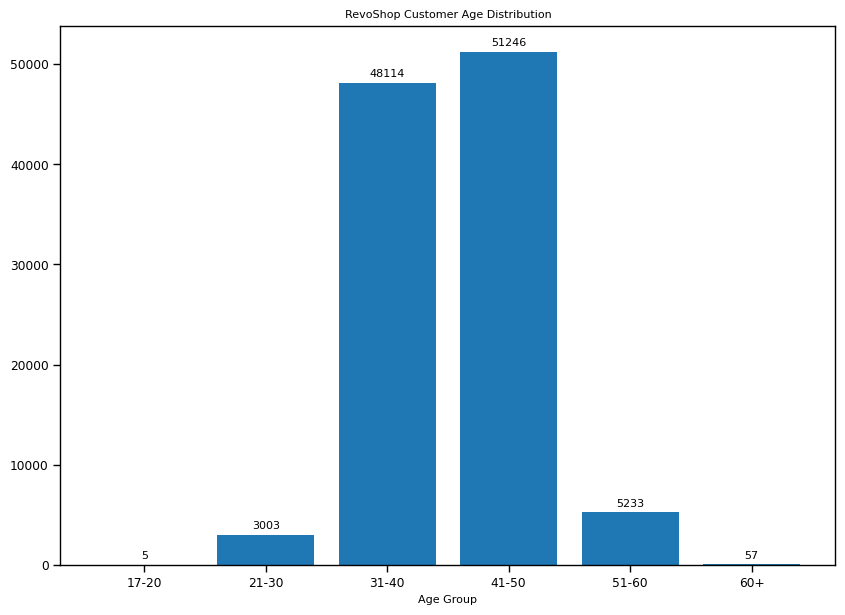

In [ ]:
# Create plot
# Defining the figure & axes
fig, ax = plt.subplots(figsize=(10,7))

# Create bar plot
ax1 = ax.bar(revo_age.index, revo_age['count'])

# Set title and labels
ax.bar_label(ax1, padding=3)
ax.set_title('RevoShop Customer Age Distribution')
ax.set_xlabel('Age Group')

fig.show()

**Gender**

In [ ]:
revo_gender = pd.DataFrame(df2['FLAG_FEMALE'].value_counts())
revo_gender.index = ['Male', 'Female']
revo_gender

,count
Male,63035
Female,44623


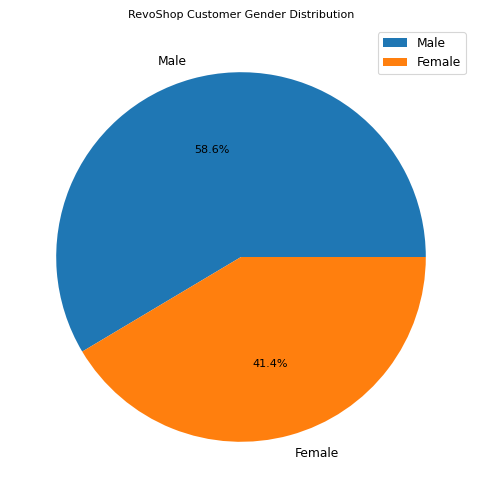

In [ ]:
# Create plot
# Defining the figure & axes
fig, ax = plt.subplots(figsize=(6,6))

# Create pie plot
ax.pie(revo_gender['count'], labels=revo_gender.index, autopct='%.1f%%')

# Set title and labels
ax.set_title('RevoShop Customer Gender Distribution')
ax.legend()

fig.show()

**MOB**

In [ ]:
# trying to group the mob for upcoming MOB distribution
# for now we will distribute the group per 5 years

max_mob = df2['MOB'].max()
min_mob = df2['MOB'].min()

df2['mob_group'] = pd.cut(df2['MOB'], [min_mob, 60, 120, 180, 240, max_mob], include_lowest=True)
df2.head()

,ACCOUNT_ID,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,...,TOTAL_SALES_PROMO_LTM,RATIO_SALES_PROMO_LTM,PROMO_SENSITIVE_LTM,TOTAL_SALES_L6M,TOTAL_SALES_PROMO_L6M,RATIO_SALES_PROMO_L6M,PROMO_SENSITIVE_L6M,age,age_group,mob_group
0,100000004,5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,5.0,21.0,2.0,...,1750.0,0.414594,0.0,1080.0,400.0,0.370370,0.0,47.123888,"(40.0, 50.0]","(120.0, 180.0]"
1,100000008,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,3.0,22.0,2.0,...,1500.0,0.597562,1.0,429.9,280.0,0.651314,1.0,31.096509,"(30.0, 40.0]","(60.0, 120.0]"
2,100000012,5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,4.0,12.0,2.0,...,1160.0,0.398297,0.0,1053.2,800.0,0.759590,1.0,52.862423,"(50.0, 60.0]","(60.0, 120.0]"
3,100000014,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,8.0,27.0,6.0,...,3900.0,0.687831,1.0,1884.8,1457.4,0.773239,1.0,39.181383,"(30.0, 40.0]","(60.0, 120.0]"
4,100000015,5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,5.0,44.0,4.0,...,1890.0,0.554252,1.0,490.0,390.0,0.795918,1.0,33.278576,"(30.0, 40.0]","(120.0, 180.0]"


In [ ]:
revo_mob = pd.DataFrame(df2['mob_group'].value_counts()).sort_index()
revo_mob.index = ['under 5 years', '5-10 years', '10-15 years', '15-20 years', '20+ years']
revo_mob

,count
under 5 years,7940
5-10 years,61976
10-15 years,37635
15-20 years,81
20+ years,26


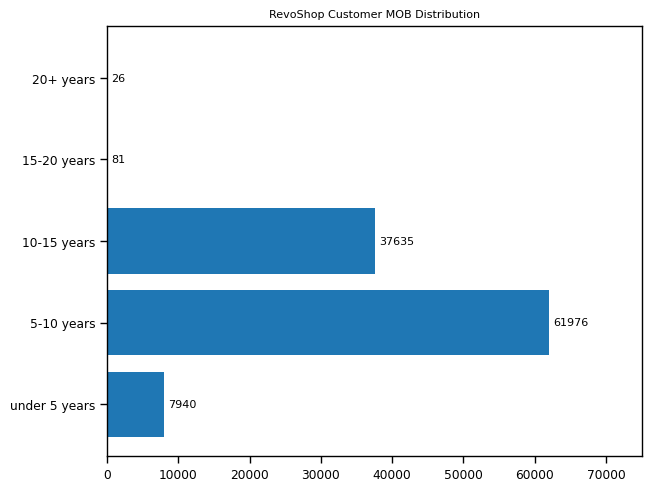

In [ ]:
# Create plot
# Defining the figure & axes
fig, ax = plt.subplots(layout='constrained')

# Create bar plot
ax1 = ax.barh(revo_mob.index, revo_mob['count'])

# Set title and labels
ax.bar_label(ax1, padding=3)
ax.set_title('RevoShop Customer MOB Distribution')
ax.set_xlim(0, 75000)

fig.show()

### How much total sales have been generated in RevoShop over the past 6 months?

In [ ]:
x = df2['TOTAL_SALES_L6M'].sum()
print(f"Total Sales generated by RevoShop in the last 6 months is {x}")

Total Sales generated by RevoShop in the last 6 months is 56639218.9


### How many sales were made in response to the promo in the last 6 months?

In [ ]:
x = df2['TOTAL_SALES_PROMO_L6M'].sum()
print(f"Total Sales generated within the promotion program by RevoShop in the last 6 months is {x}")

Total Sales generated within the promotion program by RevoShop in the last 6 months is 35208915.89999999


### What percentage of total sales at RevoShop is attributed to the promo?

In [ ]:
x = df2['TOTAL_SALES_PROMO_L6M'].sum() / df2['TOTAL_SALES_L6M'].sum()
print(f"Ratio of Total Sales generated within the promotion program by RevoShop in the last 6 months is {round(x*100,2)}%")

Ratio of Total Sales generated within the promotion program by RevoShop in the last 6 months is 62.16%


In [ ]:
x = df2['TOTAL_SALES_PROMO_LTM'].sum() / df2['TOTAL_SALES_LTM'].sum()
print(f"Ratio of Total Sales generated within the promotion program by RevoShop in a lifetime basis is {round(x*100,2)}%")

Ratio of Total Sales generated within the promotion program by RevoShop in a lifetime basis is 58.88%


### What is the average number of transactions per customer in their lifetime and over the past 6 months?

In [ ]:
# Last 6 months
print('For the past 6 months: ',df2['TXN_CNT_L6M'].mean())

# For lifetime
print('For the lifetime: ',df2['TXN_CNT_LTM'].mean())

For the past 6 months:  4.524484943060432
For the lifetime:  20.158074643779376


Note:

We have no clue on how long is "Lifetime" mentioned within the Dataset

This is because we are comparing 6-months period with unknown period ("lifetime"). And we can expect that client with higher MOB will have more transactions than client with lower MOB with the argument that they already transacting with RevoBank longer

So, the number shown above might not correctly represent the real average of transactions, due to the limitation of information provided within the dataset and project brief

### What is the total cost of the promotion over the past 6 months?

In [ ]:
# we will use 1.5 Euro as the cost for the promotion

total_cost = 1.5 * df2['PROMO_TXN_CNT_L6M'].sum()
print(f"Total cost of the promotion over the past 6 months is {total_cost} Euros")

Total cost of the promotion over the past 6 months is 456100.5 Euros


### What is the total revenue generated by the promo in the past 6 months?

In [ ]:
# Mentioned on the brief, RevoBank earns a margin of 2.4% from the transaction amount

total_revenue = 2.4 * df2['TOTAL_SALES_PROMO_L6M'].sum() / 100
print(f"Total revenue generated by the promo in the past 6 months is {total_revenue} Euros")

Total revenue generated by the promo in the past 6 months is 845013.9815999998 Euros


In [ ]:
x = total_revenue / total_cost

print(f"Which also means that total margin generated by the promo in the past 6 months is {round(x*100,2)}%")

Which also means that total margin generated by the promo in the past 6 months is 185.27%


### How many customers are considered promo-sensitive?

Actually we already did it at the cleaning process. And we will perform the same code with the cleaned dataset

In [ ]:
print(df2['PROMO_SENSITIVE_LTM'].value_counts())
print('\n')
print(df2['PROMO_SENSITIVE_L6M'].value_counts())

PROMO_SENSITIVE_LTM
1.0    73461
0.0    34197
Name: count, dtype: int64


PROMO_SENSITIVE_L6M
1.0    72091
0.0    35567
Name: count, dtype: int64


In [ ]:
df2[['PROMO_SENSITIVE_LTM','PROMO_SENSITIVE_L6M']].value_counts()

PROMO_SENSITIVE_LTM  PROMO_SENSITIVE_L6M
1.0                  1.0                    52811
                     0.0                    20650
0.0                  1.0                    19280
                     0.0                    14917
Name: count, dtype: int64

As what we concluded before, there a decrease in promo-senstive individuals in the last 6 months with 20,650 were out and 19,280 were becoming promo-sensitive

## 2) Trends Key insights

### Is there any difference in transaction behavior and promo sensitivity between active and inactive customers in the past 6 months?

There are no clear definition on the dataset about active and incative customers in the last 6 months. However, there is a column MAPP_ACTIVE_GROUP that indicated account's activity in the Bank's mobile app, as follow:
- X: High activity in mobile app
- Y: Average activity
- Z: Low activity

In [ ]:
# Getting the aggregation ofcustomer per MAPP_ACTIVE_GROUP for overall view:

df2.groupby(['MAPP_ACTIVE_GROUP']).agg({
    'ACCOUNT_ID': ['count'],
    'PROMO_SENSITIVE_L6M': ['sum'],
    'PROMO_SENSITIVE_LTM': ['sum'],
    'AVG_TXN_AMT_L6M': ['mean'],
    'AVG_TXN_AMT_LTM': ['mean'],
    'TXN_CNT_L6M': ['mean'],
    'TXN_CNT_LTM': ['mean'],
})

,ACCOUNT_ID,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM
,count,sum,sum,mean,mean,mean,mean
MAPP_ACTIVE_GROUP,,,,,,,
X,100141,67097.0,68384.0,126.648324,106.315616,4.540338,20.197482
Y,7036,4724.0,4911.0,128.039298,109.198209,4.252843,19.714042
Z,481,270.0,166.0,139.574636,176.912058,5.197505,18.449064


In [ ]:
# Getting the aggregation ofcustomer per MAPP_ACTIVE_GROUP for promo-sensitive only:

df2.groupby(['MAPP_ACTIVE_GROUP']).agg({
    'ACCOUNT_ID': ['count'],
    'PROMO_SENSITIVE_L6M': ['sum'],
    'PROMO_SENSITIVE_LTM': ['sum'],
    'AVG_PROMO_TXN_AMT_L6M': ['mean'],
    'AVG_PROMO_TXN_AMT_LTM': ['mean'],
    'PROMO_TXN_CNT_L6M': ['mean'],
    'PROMO_TXN_CNT_LTM': ['mean'],
})

,ACCOUNT_ID,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM
,count,sum,sum,mean,mean,mean,mean
MAPP_ACTIVE_GROUP,,,,,,,
X,100141,67097.0,68384.0,125.611944,119.709089,2.833515,10.365055
Y,7036,4724.0,4911.0,126.616472,119.933371,2.690023,10.471291
Z,481,270.0,166.0,130.179210,141.912682,2.887734,9.120582


### Is there any difference in transaction behavior and promo sensitivity between high-value and lower-value customers in the past 6 months?

There is a dedicated column to address customer value group in CUST_VALUE_GROUP column. The general explanation is there is 5 group, A-E. With A being the most profitable customer, and E is the least. We will use it here

In [ ]:
# Getting the aggregation ofcustomer per CUST_VALUE_GROUP for overall view:

df2.groupby(['CUST_VALUE_GROUP']).agg({
    'ACCOUNT_ID': ['count'],
    'PROMO_SENSITIVE_L6M': ['sum'],
    'PROMO_SENSITIVE_LTM': ['sum'],
    'AVG_TXN_AMT_L6M': ['mean'],
    'AVG_TXN_AMT_LTM': ['mean'],
    'TXN_CNT_L6M': ['mean'],
    'TXN_CNT_LTM': ['mean'],
})

,ACCOUNT_ID,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM
,count,sum,sum,mean,mean,mean,mean
CUST_VALUE_GROUP,,,,,,,
A,16389,11522.0,10502.0,144.849143,125.968863,4.225212,20.117030
B,16997,11347.0,11690.0,130.904477,111.048526,4.355651,19.421427
C,17734,11897.0,12173.0,125.634431,105.225426,4.533044,19.839856
D,12001,8143.0,8125.0,126.449679,104.977810,4.593951,20.267144
E,44537,29182.0,30971.0,119.142962,99.289658,4.676920,20.551631


In [ ]:
# Getting the aggregation ofcustomer per CUST_VALUE_GROUP for promo-sensitive only:

df2.groupby(['CUST_VALUE_GROUP']).agg({
    'ACCOUNT_ID': ['count'],
    'PROMO_SENSITIVE_L6M': ['sum'],
    'PROMO_SENSITIVE_LTM': ['sum'],
    'AVG_PROMO_TXN_AMT_L6M': ['mean'],
    'AVG_PROMO_TXN_AMT_LTM': ['mean'],
    'PROMO_TXN_CNT_L6M': ['mean'],
    'PROMO_TXN_CNT_LTM': ['mean'],
})

,ACCOUNT_ID,PROMO_SENSITIVE_L6M,PROMO_SENSITIVE_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM
,count,sum,sum,mean,mean,mean,mean
CUST_VALUE_GROUP,,,,,,,
A,16389,11522.0,10502.0,143.474568,136.423455,2.713710,10.105193
B,16997,11347.0,11690.0,130.162399,124.028534,2.731659,10.104136
C,17734,11897.0,12173.0,124.363618,118.439472,2.837487,10.274050
D,12001,8143.0,8125.0,125.496867,118.176744,2.872677,10.383885
E,44537,29182.0,30971.0,118.038218,113.103653,2.882255,10.594764


### Is there a relationship between increasing the number of email and SMS messages and improved sales performance?

Overall view on number of email or SMS sent associating with promo

CNT_PROMO_L6M
0.0        56
1.0       306
2.0      1223
3.0      2932
4.0     10458
5.0     25484
6.0     47795
7.0     13555
8.0      2209
9.0      1124
10.0      942
11.0     1111
12.0      337
13.0       56
14.0        7
15.0        4
16.0       26
17.0       14
18.0        5
19.0        5
20.0        6
21.0        3
Name: count, dtype: int64


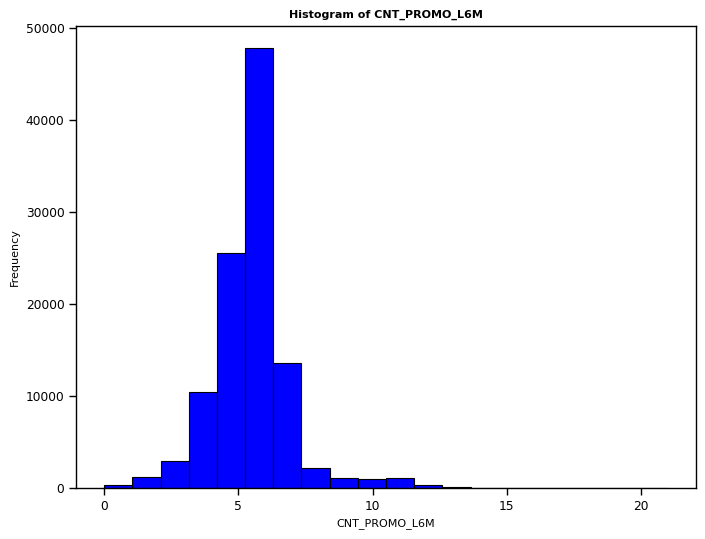

In [ ]:
# General view on number of email or SMS sent to customers
print(df2['CNT_PROMO_L6M'].value_counts().sort_index())

# Create the histogram
plt.figure(figsize=(8, 6))  # Optional: setting figure size
plt.hist(df2['CNT_PROMO_L6M'].dropna(), bins=20, color='blue', edgecolor='black')  # Adjust bins as needed

# Add labels and title
plt.title('Histogram of CNT_PROMO_L6M',fontweight='bold')
plt.xlabel('CNT_PROMO_L6M')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Break down per PROMO_CHANNEL of email or SMS

PROMO_CHANNEL  CNT_PROMO_L6M
0.0            0.0                 33
               1.0                205
               2.0                857
               3.0               2006
               4.0               7296
               5.0              17942
               6.0              33348
               7.0               9584
               8.0               1524
               9.0                773
               10.0               649
               11.0               768
               12.0               226
               13.0                39
               14.0                 2
               15.0                 2
               16.0                18
               17.0                11
               18.0                 5
               19.0                 4
               20.0                 5
               21.0                 2
1.0            0.0                 23
               1.0                101
               2.0                366
               3.0   

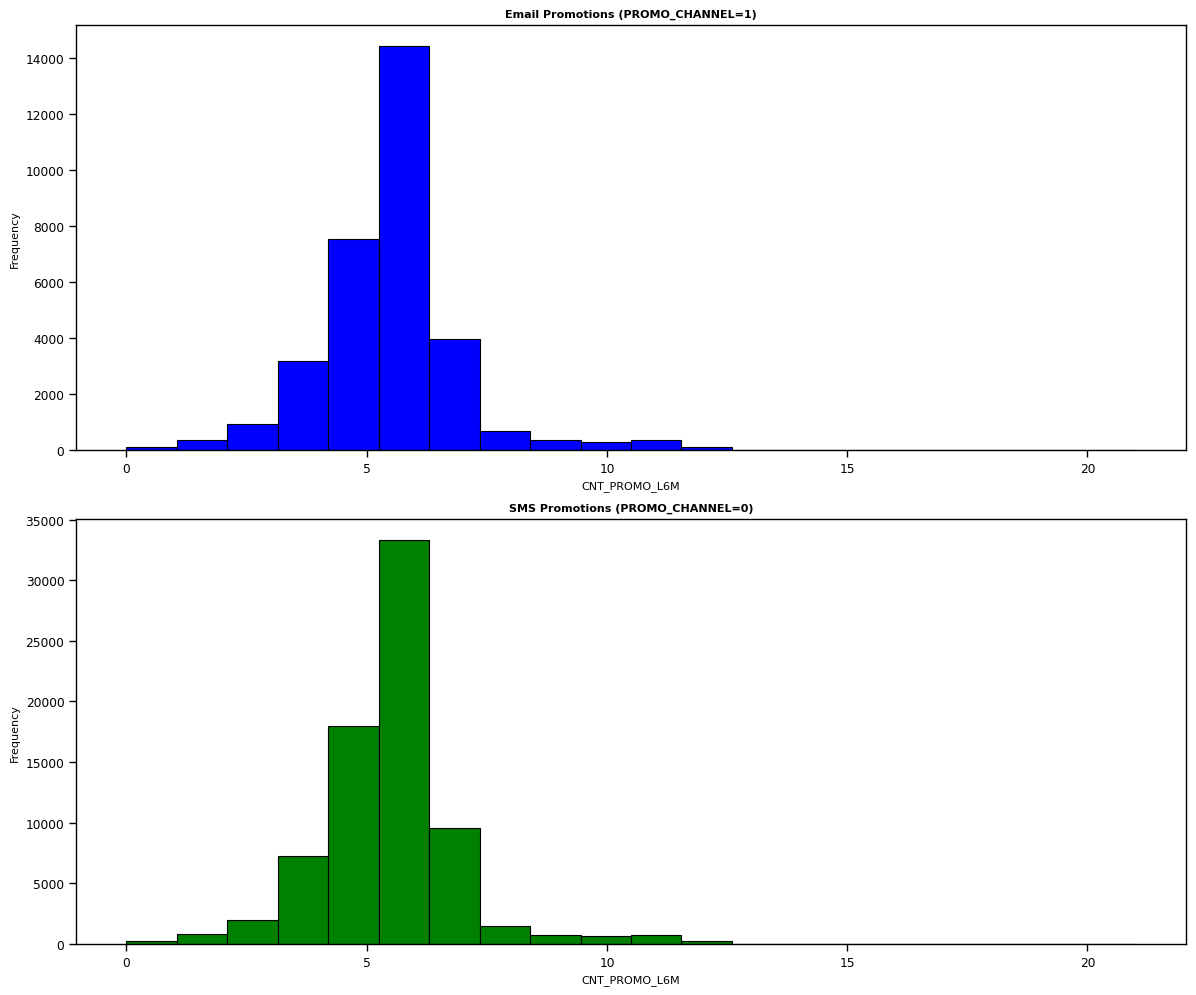

In [ ]:
# Break down view on number of email or SMS sent to customers
print(df2[['PROMO_CHANNEL', 'CNT_PROMO_L6M']].groupby('PROMO_CHANNEL').value_counts().sort_index())

# Filter data for each channel
email_promos = df[df['PROMO_CHANNEL'] == 1]['CNT_PROMO_L6M'].dropna()
sms_promos = df[df['PROMO_CHANNEL'] == 0]['CNT_PROMO_L6M'].dropna()

# Create the histograms side by side
plt.figure(figsize=(12, 10))

# Histogram for Email Promotions
plt.subplot(2, 1, 1)  # 2 row, 1 columns, first subplot
plt.hist(email_promos, bins=20, color='blue', edgecolor='black')
plt.title('Email Promotions (PROMO_CHANNEL=1)', fontweight='bold')
plt.xlabel('CNT_PROMO_L6M')
plt.ylabel('Frequency')

# Histogram for SMS Promotions
plt.subplot(2, 1, 2)  # 2 row, 1 columns, second subplot
plt.hist(sms_promos, bins=20, color='green', edgecolor='black')
plt.title('SMS Promotions (PROMO_CHANNEL=0)', fontweight='bold')
plt.xlabel('CNT_PROMO_L6M')
plt.ylabel('Frequency')

# Increase space between the two histograms
plt.subplots_adjust(hspace=2)  # Increase hspace to adjust the vertical spacing

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Comparison of the Promo Channels with impact on Sales

In [ ]:
df2.groupby(['CNT_PROMO_L6M']).agg({
    'ACCOUNT_ID': ['count'],
    'TOTAL_SALES_L6M': ['mean'],
    'TOTAL_SALES_PROMO_L6M': ['mean']
})

,ACCOUNT_ID,TOTAL_SALES_L6M,TOTAL_SALES_PROMO_L6M
,count,mean,mean
CNT_PROMO_L6M,,,
0.0,56,271.858929,133.925000
1.0,306,381.355882,241.678431
2.0,1223,318.512183,211.239248
3.0,2932,321.238677,196.057844
4.0,10458,362.937397,222.069038
5.0,25484,425.779634,263.673925
6.0,47795,570.854960,348.944737
7.0,13555,679.289723,450.262221


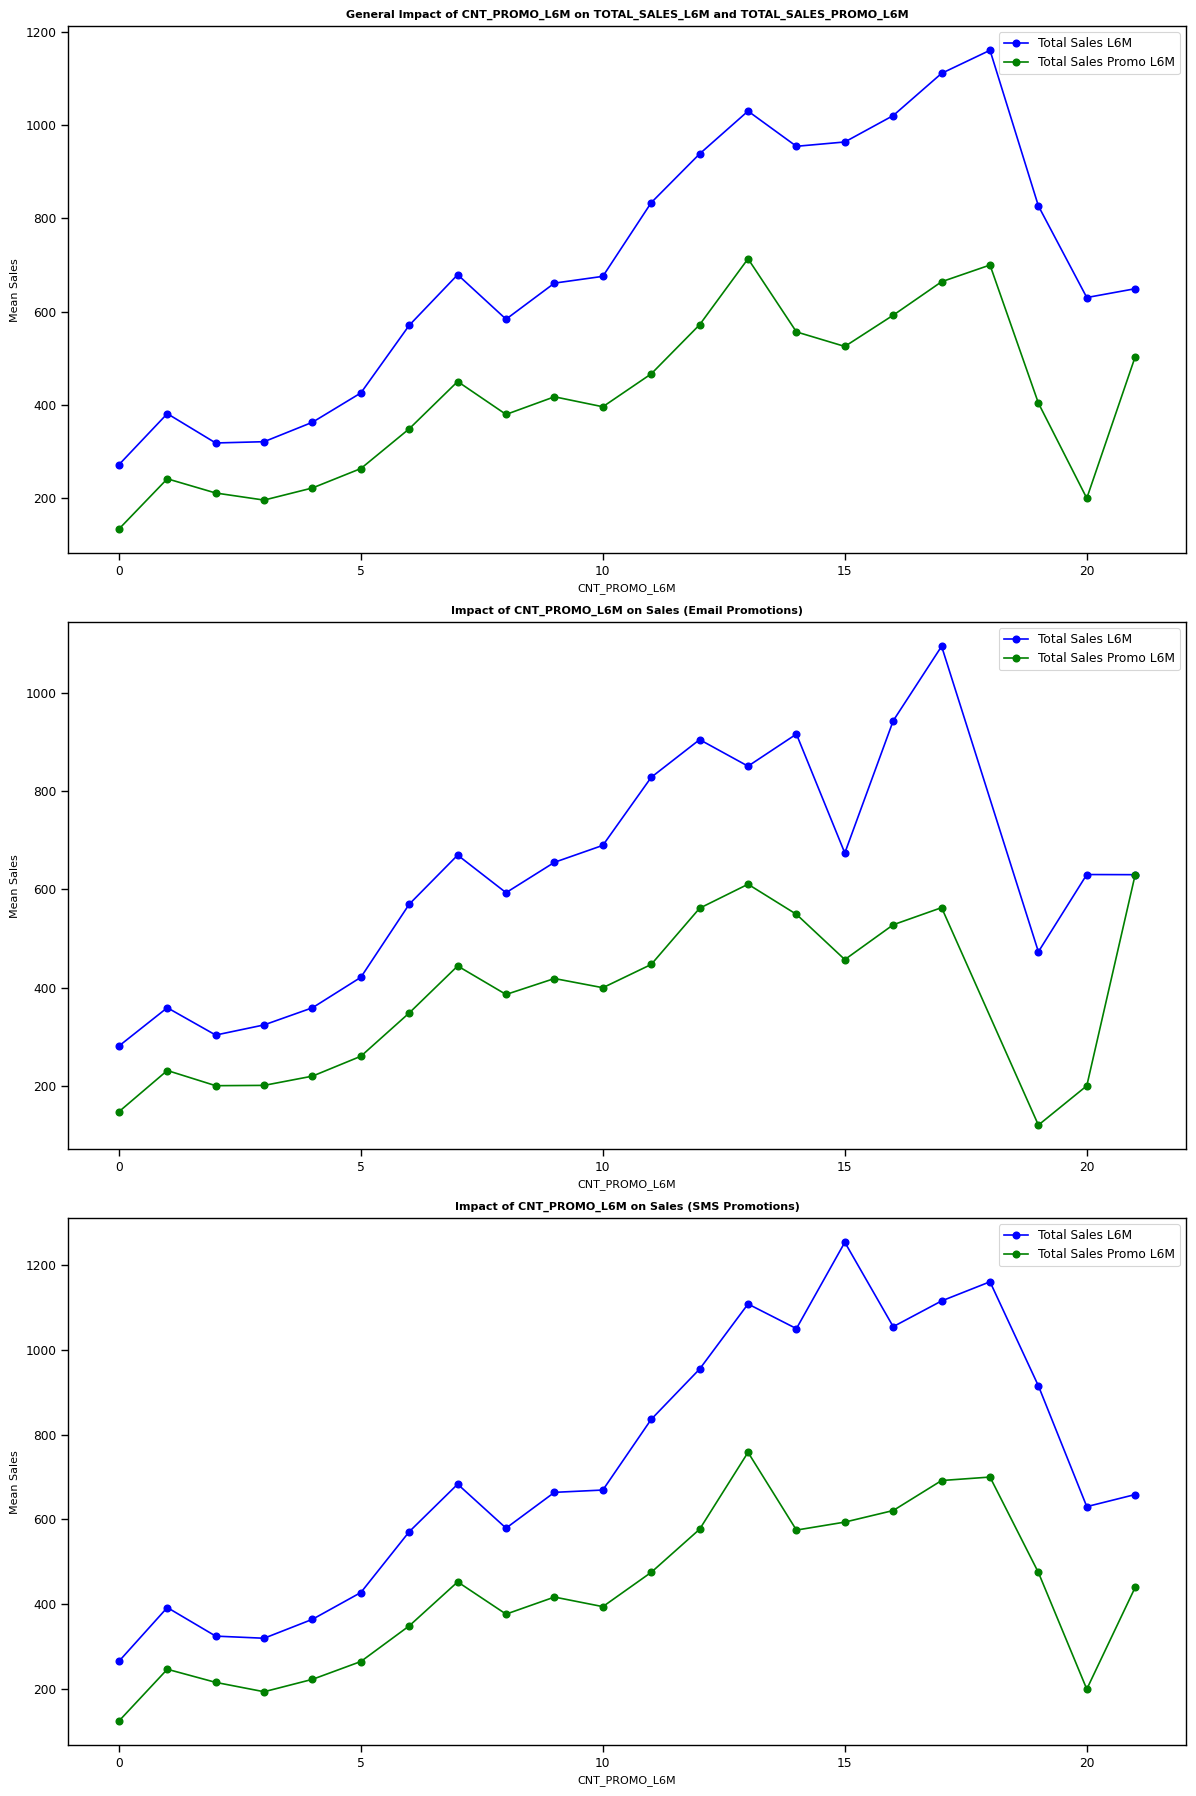

In [ ]:
# General Aggregation (no promo channel distinction)
general_agg = df2.groupby('CNT_PROMO_L6M').agg({
    'TOTAL_SALES_L6M': 'mean',
    'TOTAL_SALES_PROMO_L6M': 'mean'
}).reset_index()

# Aggregation for Email (PROMO_CHANNEL = 1)
email_agg = df2[df2['PROMO_CHANNEL'] == 1].groupby('CNT_PROMO_L6M').agg({
    'TOTAL_SALES_L6M': 'mean',
    'TOTAL_SALES_PROMO_L6M': 'mean'
}).reset_index()

# Aggregation for SMS (PROMO_CHANNEL = 0)
sms_agg = df2[df2['PROMO_CHANNEL'] == 0].groupby('CNT_PROMO_L6M').agg({
    'TOTAL_SALES_L6M': 'mean',
    'TOTAL_SALES_PROMO_L6M': 'mean'
}).reset_index()

# Create the visualizations
plt.figure(figsize=(12, 18))  # Adjust size for 3 plots

# 1. General Line Plot
plt.subplot(3, 1, 1)
plt.plot(general_agg['CNT_PROMO_L6M'], general_agg['TOTAL_SALES_L6M'], label='Total Sales L6M', color='blue', marker='o')
plt.plot(general_agg['CNT_PROMO_L6M'], general_agg['TOTAL_SALES_PROMO_L6M'], label='Total Sales Promo L6M', color='green', marker='o')
plt.title('General Impact of CNT_PROMO_L6M on TOTAL_SALES_L6M and TOTAL_SALES_PROMO_L6M', fontweight='bold')
plt.xlabel('CNT_PROMO_L6M')
plt.ylabel('Mean Sales')
plt.legend()

# 2. Line Plot for Email Promotions
plt.subplot(3, 1, 2)
plt.plot(email_agg['CNT_PROMO_L6M'], email_agg['TOTAL_SALES_L6M'], label='Total Sales L6M', color='blue', marker='o')
plt.plot(email_agg['CNT_PROMO_L6M'], email_agg['TOTAL_SALES_PROMO_L6M'], label='Total Sales Promo L6M', color='green', marker='o')
plt.title('Impact of CNT_PROMO_L6M on Sales (Email Promotions)', fontweight='bold')
plt.xlabel('CNT_PROMO_L6M')
plt.ylabel('Mean Sales')
plt.legend()

# 3. Line Plot for SMS Promotions
plt.subplot(3, 1, 3)
plt.plot(sms_agg['CNT_PROMO_L6M'], sms_agg['TOTAL_SALES_L6M'], label='Total Sales L6M', color='blue', marker='o')
plt.plot(sms_agg['CNT_PROMO_L6M'], sms_agg['TOTAL_SALES_PROMO_L6M'], label='Total Sales Promo L6M', color='green', marker='o')
plt.title('Impact of CNT_PROMO_L6M on Sales (SMS Promotions)', fontweight='bold')
plt.xlabel('CNT_PROMO_L6M')
plt.ylabel('Mean Sales')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

Speaking on the general impact to Sales, Email and SMS are seems quite helpful in increasing the sales. The same thing also can be said per each Promotion Channels

# RFM Segmentation

In this project, we will use RFM Segmentation method. And since it is mentioned that this segmentation will be used to decide prioritization of promo, the revelant transactions is the one that use promo.

The variable that we use to define the Recency, Frequency and Monetory are:
- Recency: LAST_TXN_DAY
- Frequency: PROMO_TXN_CNT_L6M
- Monetary: AVG_PROMO_TXN_AMT_L6M

In [ ]:
# we need to check if there are Customer that did not use any promo in the last 6 months
population = df2['ACCOUNT_ID'].nunique()
check = df2['PROMO_TXN_CNT_L6M'].isna().count()
print(f"The total population of the dataset is {population} and the total customers who use the promo is {check}.")
print(f"{'Since the values are the same, we can proceed to use the dataset without any adjustment.' if population == check else 'Since the values are different, we will filter the data with customers who were using the promo.'}")

The total population of the dataset is 107658 and the total customers who use the promo is 107658.
Since the values are the same, we can proceed to use the dataset without any adjustment.


## Determining RFM variables

In [ ]:
rfm = df2[['ACCOUNT_ID','LAST_TXN_DAY','PROMO_TXN_CNT_L6M','AVG_PROMO_TXN_AMT_L6M']].copy()
rfm.columns = ['ACCOUNT_ID','recency','frequency','monetary']
rfm

,ACCOUNT_ID,recency,frequency,monetary
0,100000004,15.0,2.0,200.0
1,100000008,20.0,2.0,140.0
2,100000012,16.0,2.0,400.0
3,100000014,20.0,6.0,242.9
4,100000015,25.0,4.0,97.5
...,...,...,...,...
112628,101059832,4.0,2.0,100.0
112629,101059843,8.0,1.0,120.0
112630,101059857,19.0,3.0,46.7
112631,101059860,16.0,2.0,190.0


Checking each column for the distribution

<Axes: xlabel='recency'>

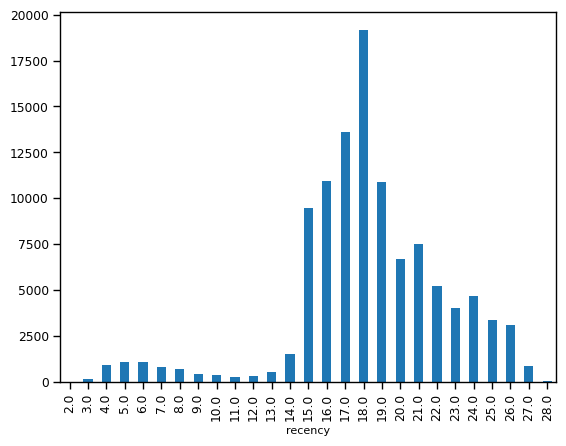

In [ ]:
# Let's do a value_counts to see the distribution of the recency
rfm['recency'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='frequency'>

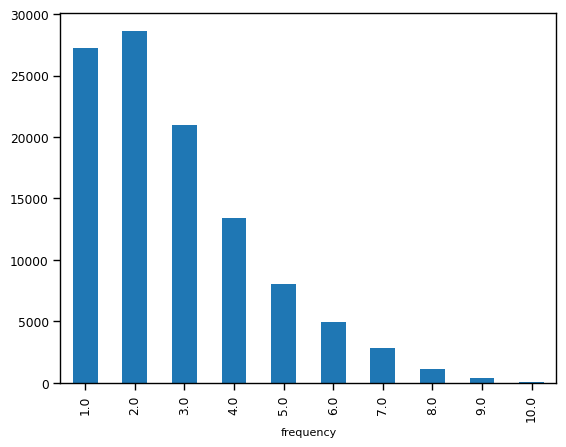

In [ ]:
# Let's do a value_counts to see the distribution of the frequency
rfm['frequency'].value_counts().sort_index().plot(kind='bar')

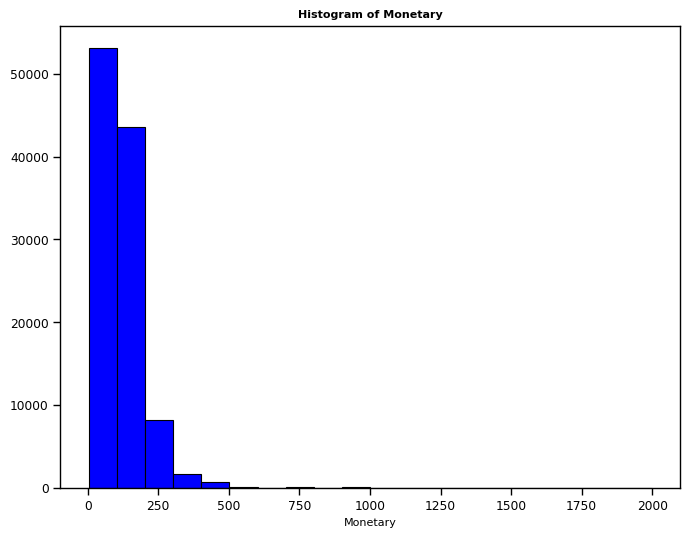

In [ ]:
# Let's do a value_counts to see the distribution of the monetary

plt.figure(figsize=(8, 6))  # Optional: setting figure size
plt.hist(rfm['monetary'].dropna(), bins=20, color='blue', edgecolor='black')  # Adjust bins as needed

# Add labels and title
plt.title('Histogram of Monetary',fontweight='bold')
plt.xlabel('Monetary')

# Show the plot
plt.show()

## Create RFM score

We can manipulate the RFM score into more standarized one to each variable. And in this case, we will use scale of 1-5 on each Recency, Frequency and Monetary of each customers

In [ ]:
# Lets see if we can be cut Recency into 5 Groups

pd.qcut(rfm['recency'], q = 5).value_counts().sort_index()

,count
recency,
"(1.999, 16.0]",28451
"(16.0, 18.0]",32807
"(18.0, 19.0]",10889
"(19.0, 21.0]",14234
"(21.0, 28.0]",21277


In [ ]:
# Lets see if we can be cut Frequency into 5 Groups

# as we tried, there are many duplicates and we need to address it on our code
# And since we previously use q=5 the cut only give output of 4 groups, we try another bigger number and found that to make 5 groups, we need to use q=7

pd.qcut(rfm['frequency'], q = 7, duplicates='drop').value_counts().sort_index()

,count
frequency,
"(0.999, 2.0]",55850
"(2.0, 3.0]",20939
"(3.0, 4.0]",13448
"(4.0, 5.0]",8020
"(5.0, 10.0]",9401


In [ ]:
# Lets see if we can cut Monetary into 5 Groups

pd.qcut(rfm['monetary'], q = 5).value_counts().sort_index()

,count
monetary,
"(3.1990000000000003, 70.0]",21790
"(70.0, 100.0]",30834
"(100.0, 120.0]",14861
"(120.0, 160.0]",19455
"(160.0, 2000.0]",20718


Lets make a dedicated datafram for RFM Segmentation

In [ ]:
# Copy the RFM df
rfm2 = rfm.copy()

# Create RFM score
rfm2['r_score'] = pd.qcut(rfm2['recency'], q = 5, labels = ['5','4','3','2','1'])   #must be altered in revese since the lower recency number is better
rfm2['f_score'] = pd.qcut(rfm2['frequency'], q = 7, duplicates = 'drop', labels = ['1','2','3','4','5'])
rfm2['m_score'] = pd.qcut(rfm2['monetary'], q = 5, labels = ['1','2','3','4','5'])

# Combine all scores
rfm2['rfm_score'] = rfm2['r_score'].astype(str) + rfm2['f_score'].astype(str) + rfm2['m_score'].astype(str)
rfm2

,ACCOUNT_ID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,100000004,15.0,2.0,200.0,5,1,5,515
1,100000008,20.0,2.0,140.0,2,1,4,214
2,100000012,16.0,2.0,400.0,5,1,5,515
3,100000014,20.0,6.0,242.9,2,5,5,255
4,100000015,25.0,4.0,97.5,1,3,2,132
...,...,...,...,...,...,...,...,...
112628,101059832,4.0,2.0,100.0,5,1,2,512
112629,101059843,8.0,1.0,120.0,5,1,3,513
112630,101059857,19.0,3.0,46.7,3,2,1,321
112631,101059860,16.0,2.0,190.0,5,1,5,515


## Interpreting RFM Score

On the brief, there are no RFM Score definition provided. So, we choose to use the template given in [this article](https://help.moengage.com/hc/en-us/articles/360037365132-RFM-Segments#01H845E5595EFK3PRDRQ8ZXKZ3). The article provide not only the characteristic of the segments, but also actions per segments existed.

As for this project, we adapted the information into usable [Google Spreadsheet file](https://docs.google.com/spreadsheets/d/1n2dVyBBUsDq38Spddsd5-yMu-oJdjj7RFSIzl8WUBEw/edit?gid=1746579629#gid=1746579629). And within, we have defined what RFM combination can fit into each segments

Now, lets import the file and merge it to our DataFrame

In [ ]:
GSHEET_URL = 'https://docs.google.com/spreadsheets/d/1n2dVyBBUsDq38Spddsd5-yMu-oJdjj7RFSIzl8WUBEw/edit?gid=1746579629#gid=1746579629'
GSHEET_URL_CSV = GSHEET_URL.replace('/edit?gid=1746579629#gid=', '/export?format=csv&gid=')
rfm_segments = pd.read_csv(GSHEET_URL_CSV)

rfm_segments['rfm_score'] = rfm_segments['rfm_score'].astype(str)
rfm_segments

,rfm_score,segment,Activity,Actionable
0,555,Champions,"Users who have visited most recently, visited ...",Reward these users. They promote your products...
1,554,Champions,"Users who have visited most recently, visited ...",Reward these users. They promote your products...
2,544,Champions,"Users who have visited most recently, visited ...",Reward these users. They promote your products...
3,545,Champions,"Users who have visited most recently, visited ...",Reward these users. They promote your products...
4,454,Champions,"Users who have visited most recently, visited ...",Reward these users. They promote your products...
...,...,...,...,...
120,112,Lost,"Lowest recency, frequency, and monetary scores.",Make your presence known through different cam...
121,121,Lost,"Lowest recency, frequency, and monetary scores.",Make your presence known through different cam...
122,131,Lost,"Lowest recency, frequency, and monetary scores.",Make your presence known through different cam...
123,141,Lost,"Lowest recency, frequency, and monetary scores.",Make your presence known through different cam...


Then we can merge the intepration to our main rfm dataframe

In [ ]:
# Let's merge the score and the segment definition
rfm3 = rfm2.merge(rfm_segments, how='left', left_on = 'rfm_score', right_on = 'rfm_score').copy()
rfm3

,ACCOUNT_ID,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,segment,Activity,Actionable
0,100000004,15.0,2.0,200.0,5,1,5,515,Promising,"Average recency, frequency, and monetary scores",Make them loyal by creating brand awareness an...
1,100000008,20.0,2.0,140.0,2,1,4,214,Can’t Lose Them,The user has spent a great amount and visited ...,"Listen to their feedback, suggest them newer p..."
2,100000012,16.0,2.0,400.0,5,1,5,515,Promising,"Average recency, frequency, and monetary scores",Make them loyal by creating brand awareness an...
3,100000014,20.0,6.0,242.9,2,5,5,255,At Risk,NaN,NaN
4,100000015,25.0,4.0,97.5,1,3,2,132,Hibernating,"The user's last visit was long back, visits ar...",Recommend products for other categories and pr...
...,...,...,...,...,...,...,...,...,...,...,...
107653,101059832,4.0,2.0,100.0,5,1,2,512,Recent Customers,NaN,NaN
107654,101059843,8.0,1.0,120.0,5,1,3,513,Promising,"Average recency, frequency, and monetary scores",Make them loyal by creating brand awareness an...
107655,101059857,19.0,3.0,46.7,3,2,1,321,About To Sleep,"Below-average recency, frequency, and monetary...",The user will be lost if not reactivated. Reco...
107656,101059860,16.0,2.0,190.0,5,1,5,515,Promising,"Average recency, frequency, and monetary scores",Make them loyal by creating brand awareness an...


In [ ]:
# Let's check the biggest segment group
rfm3[['segment','Activity']].value_counts()

,,count
segment,Activity,
Promising,"Average recency, frequency, and monetary scores",28194
Potential Loyalist,"A recent user, who spent a good amount",14639
Hibernating,"The user's last visit was long back, visits are not often, and has not spent much",10487
Can’t Lose Them,The user has spent a great amount and visited often but long ago (not visited recently),9941
Lost,"Lowest recency, frequency, and monetary scores.",6022
About To Sleep,"Below-average recency, frequency, and monetary values",4057
Loyal Customers,Users who visited recently visited often and spent a great amount,1828
Champions,"Users who have visited most recently, visited most frequently and spent the most.",1737


## Identifying Segment Characteristics

Identify the segments that have higher average sales per client, higher average transaction frequency per client, higher revenue generated, and/or a larger proportion of promo-sensitive clients compared to others.

In [ ]:
# Merge back rfm3 to df2
rfm4 = rfm3[['ACCOUNT_ID','rfm_score','segment','Activity']].copy()
rfm4 = rfm4.merge(df2, how = 'left', right_on = 'ACCOUNT_ID', left_on = 'ACCOUNT_ID')
rfm4

,ACCOUNT_ID,rfm_score,segment,Activity,MCC,MERCHANT_NAME,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,...,TOTAL_SALES_PROMO_LTM,RATIO_SALES_PROMO_LTM,PROMO_SENSITIVE_LTM,TOTAL_SALES_L6M,TOTAL_SALES_PROMO_L6M,RATIO_SALES_PROMO_L6M,PROMO_SENSITIVE_L6M,age,age_group,mob_group
0,100000004,515,Promising,"Average recency, frequency, and monetary scores",5262-MARKETPLACES,REVOSHOP,216.0,201.0,200.0,250.0,...,1750.0,0.414594,0.0,1080.0,400.0,0.370370,0.0,47.123888,"(40.0, 50.0]","(120.0, 180.0]"
1,100000008,214,Can’t Lose Them,The user has spent a great amount and visited ...,5262-MARKETPLACES,REVOSHOP,143.3,114.1,140.0,150.0,...,1500.0,0.597562,1.0,429.9,280.0,0.651314,1.0,31.096509,"(30.0, 40.0]","(60.0, 120.0]"
2,100000012,515,Promising,"Average recency, frequency, and monetary scores",5262-MARKETPLACES,REVOSHOP,263.3,242.7,400.0,290.0,...,1160.0,0.398297,0.0,1053.2,800.0,0.759590,1.0,52.862423,"(50.0, 60.0]","(60.0, 120.0]"
3,100000014,255,At Risk,NaN,5262-MARKETPLACES,REVOSHOP,235.6,210.0,242.9,300.0,...,3900.0,0.687831,1.0,1884.8,1457.4,0.773239,1.0,39.181383,"(30.0, 40.0]","(60.0, 120.0]"
4,100000015,132,Hibernating,"The user's last visit was long back, visits ar...",5262-MARKETPLACES,REVOSHOP,98.0,77.5,97.5,90.0,...,1890.0,0.554252,1.0,490.0,390.0,0.795918,1.0,33.278576,"(30.0, 40.0]","(120.0, 180.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107653,101059832,512,Recent Customers,NaN,5262-MARKETPLACES,REVOSHOP,100.0,84.2,100.0,100.0,...,500.0,0.494854,0.0,200.0,200.0,1.000000,1.0,43.690623,"(40.0, 50.0]","(120.0, 180.0]"
107654,101059843,513,Promising,"Average recency, frequency, and monetary scores",5262-MARKETPLACES,REVOSHOP,120.0,113.4,120.0,200.0,...,1000.0,0.400834,0.0,360.0,120.0,0.333333,0.0,29.549624,"(20.0, 30.0]","(60.0, 120.0]"
107655,101059857,321,About To Sleep,"Below-average recency, frequency, and monetary...",5262-MARKETPLACES,REVOSHOP,52.9,36.8,46.7,70.0,...,840.0,0.815217,1.0,370.3,140.1,0.378342,0.0,42.948665,"(40.0, 50.0]","(120.0, 180.0]"
107656,101059860,515,Promising,"Average recency, frequency, and monetary scores",5262-MARKETPLACES,REVOSHOP,195.0,147.3,190.0,200.0,...,2000.0,0.590336,1.0,585.0,380.0,0.649573,1.0,36.090349,"(30.0, 40.0]","(60.0, 120.0]"


In [ ]:
# L6M promotions
# higher average sales per client, higher average transaction frequency per client, higher revenue generated, and/or a larger proportion of promo-sensitive clients compared to others
rfm_segment_analysis = rfm4.groupby(['segment']).agg({
    'ACCOUNT_ID' : ['count'],
    'PROMO_SENSITIVE_LTM' : ['sum'],
    'PROMO_SENSITIVE_L6M' : ['sum'],
    'AVG_PROMO_TXN_AMT_L6M' : ['mean'],
    'AVG_PROMO_TXN_AMT_LTM' : ['mean'],
    'PROMO_TXN_CNT_L6M' : ['mean'],
    'PROMO_TXN_CNT_LTM' : ['mean'],
    'TOTAL_SALES_L6M' : ['mean'],
    'TOTAL_SALES_PROMO_L6M' : ['mean'],
    'TOTAL_SALES_LTM' : ['mean'],
    'TOTAL_SALES_PROMO_LTM' : ['mean'],
})

rfm_segment_analysis

,ACCOUNT_ID,PROMO_SENSITIVE_LTM,PROMO_SENSITIVE_L6M,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,TOTAL_SALES_L6M,TOTAL_SALES_PROMO_L6M,TOTAL_SALES_LTM,TOTAL_SALES_PROMO_LTM
,count,sum,sum,mean,mean,mean,mean,mean,mean,mean,mean
segment,,,,,,,,,,,
About To Sleep,4057,2875.0,2188.0,86.827754,88.825487,2.120286,10.006162,319.191989,165.271481,1446.392605,872.578260
At Risk,8586,7223.0,8308.0,156.739739,154.833217,4.217447,12.028535,824.737340,626.903191,2826.918775,1831.195085
Can’t Lose Them,9941,7297.0,6749.0,180.645649,172.001117,1.793079,9.569460,507.004929,318.739493,2687.545951,1638.887909
Champions,1737,1386.0,1678.0,189.583362,190.426022,6.001727,13.149108,1566.092976,1129.621877,3996.649683,2420.454807
Customers Needing Attention,3044,2231.0,2807.0,161.616590,150.433640,3.854139,10.726347,886.779895,609.051281,2655.639422,1590.742444
Hibernating,10487,8155.0,8560.0,87.949766,90.301802,3.273672,11.261943,407.130123,272.205588,1599.428225,1000.901592
Lost,6022,4318.0,3333.0,81.357821,87.864497,2.505812,10.803554,310.181933,175.730555,1562.608037,909.108270
Loyal Customers,1828,1400.0,1766.0,184.980197,180.060175,4.738512,11.818928,1194.563020,853.385722,3369.313621,2099.496718


From here on, we can gain insight of each segment defined by the RFM Segmentation method into answering the business questions. Depending on what problem that we are trying to solve. Since it will be vary from person to person, we will leave it here as I only want to showcase my skills in doing RFM Segmentation

# Data Cleaning & Preparation for Propensity Modelling

## Data Cleaning for Paylater Pilot Result table

In [ ]:
paylater.head()

,ACCOUNT_ID,PAYLATER_ACTIVE,PAYLATER_TRANSACTIONS,PAYLATER_TOTAL_SALES,PAYLATER_ACTIVATION_DT
0,100000004,0,0,NaN,NaN
1,100000008,0,0,NaN,NaN
2,100000012,0,0,NaN,NaN
3,100000014,0,0,NaN,NaN
4,100000015,0,0,NaN,NaN


In [ ]:
paylater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112433 entries, 0 to 112432
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACCOUNT_ID              112433 non-null  int64  
 1   PAYLATER_ACTIVE         112433 non-null  int64  
 2   PAYLATER_TRANSACTIONS   112433 non-null  int64  
 3   PAYLATER_TOTAL_SALES    7580 non-null    float64
 4   PAYLATER_ACTIVATION_DT  7580 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.3+ MB


As what we can see here, there are many null value exist on PAYLATER_TOTAL_SALES and PAYLATER_ACTIVATION_DT columns. As we only see this anomalies, we can straight to treat the null value as the main action on our data cleaning for this table, because 0 indicates no sales or no activation dates which will be a problem for the propensity modelling if left blanks

In [ ]:
# We fill missing values with 0 because it indicated no sales/no activation dates
paylater2 = paylater.fillna(0).copy()
paylater2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112433 entries, 0 to 112432
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ACCOUNT_ID              112433 non-null  int64  
 1   PAYLATER_ACTIVE         112433 non-null  int64  
 2   PAYLATER_TRANSACTIONS   112433 non-null  int64  
 3   PAYLATER_TOTAL_SALES    112433 non-null  float64
 4   PAYLATER_ACTIVATION_DT  112433 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 4.3+ MB


## Data Manipulation for Paylater Pilot Result table

### Paylater Active Transaction column

In [ ]:
# We create the target variables
# The target variable is whether the customer already activating and using PayLater (PAYLATER_ACTIVE = 1 and PAYLATER_TOTAL_SALES > 0) in the next 3 months
paylater2['PAYLATER_ACTIVE_TRANSACT'] = 0
paylater2.loc[((paylater2['PAYLATER_ACTIVE'] == 1) & (paylater2['PAYLATER_TOTAL_SALES'] > 0)), 'PAYLATER_ACTIVE_TRANSACT'] = 1

In [ ]:
paylater2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112433 entries, 0 to 112432
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ACCOUNT_ID                112433 non-null  int64  
 1   PAYLATER_ACTIVE           112433 non-null  int64  
 2   PAYLATER_TRANSACTIONS     112433 non-null  int64  
 3   PAYLATER_TOTAL_SALES      112433 non-null  float64
 4   PAYLATER_ACTIVATION_DT    112433 non-null  object 
 5   PAYLATER_ACTIVE_TRANSACT  112433 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.1+ MB


In [ ]:
# There is only 6% of customers activating & using their accounts
paylater2['PAYLATER_ACTIVE_TRANSACT'].value_counts(normalize=True)

,proportion
PAYLATER_ACTIVE_TRANSACT,
0,0.933792
1,0.066208


### Create new feature for Propensity Model

Since we create many additional feature on the previous Bank Promotion dataset, we previously choose to make a copy for DataFrame right after we add the feature to indetify Promo Sensitive Customers

Lets recall the DataFrame variable

In [ ]:
df3 = promo_model.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107658 entries, 0 to 112632
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ACCOUNT_ID             107658 non-null  int64         
 1   MCC                    107658 non-null  object        
 2   MERCHANT_NAME          107658 non-null  object        
 3   AVG_TXN_AMT_L6M        107658 non-null  float64       
 4   AVG_TXN_AMT_LTM        107658 non-null  float64       
 5   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64       
 6   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64       
 7   TXN_CNT_L6M            107658 non-null  float64       
 8   TXN_CNT_LTM            107658 non-null  float64       
 9   PROMO_TXN_CNT_L6M      107658 non-null  float64       
 10  PROMO_TXN_CNT_LTM      107658 non-null  float64       
 11  LAST_TXN_DAY           107658 non-null  float64       
 12  CNT_PROMO_L6M          107658 non-null  float64  

In [ ]:
# Lets add another feature column that we can use in the modelling and remove irrelevant ones
df3['AGE'] = (datetime(year=2023, month=1, day=31) - df3['BIRTH_DATE']).dt.days / 365.25  # like previous attempt on EDA
df3 = df3.drop(columns = ['MCC','MERCHANT_NAME','BIRTH_DATE'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107658 entries, 0 to 112632
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             107658 non-null  int64  
 1   AVG_TXN_AMT_L6M        107658 non-null  float64
 2   AVG_TXN_AMT_LTM        107658 non-null  float64
 3   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64
 4   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64
 5   TXN_CNT_L6M            107658 non-null  float64
 6   TXN_CNT_LTM            107658 non-null  float64
 7   PROMO_TXN_CNT_L6M      107658 non-null  float64
 8   PROMO_TXN_CNT_LTM      107658 non-null  float64
 9   LAST_TXN_DAY           107658 non-null  float64
 10  CNT_PROMO_L6M          107658 non-null  float64
 11  CNT_PROMO_L12M         107658 non-null  float64
 12  CUST_VALUE_GROUP       107658 non-null  object 
 13  MAPP_ACTIVE_GROUP      107658 non-null  object 
 14  HOMEOWNER_STATUS       107658 non-null  f

In [ ]:
# Check any categorical columns
label_column = ['PAYLATER_ACTIVE_TRANSACT']
categorical_columns = df3.select_dtypes(include='object').columns.to_list()
categorical_columns = [col for col in categorical_columns if col not in label_column]
categorical_columns

['CUST_VALUE_GROUP', 'MAPP_ACTIVE_GROUP']

In [ ]:
# Create new df for dummies
df_dummies = df3.copy()
df_dummies = pd.get_dummies(df_dummies, columns=categorical_columns, drop_first='if_binary')
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107658 entries, 0 to 112632
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ACCOUNT_ID             107658 non-null  int64  
 1   AVG_TXN_AMT_L6M        107658 non-null  float64
 2   AVG_TXN_AMT_LTM        107658 non-null  float64
 3   AVG_PROMO_TXN_AMT_L6M  107658 non-null  float64
 4   AVG_PROMO_TXN_AMT_LTM  107658 non-null  float64
 5   TXN_CNT_L6M            107658 non-null  float64
 6   TXN_CNT_LTM            107658 non-null  float64
 7   PROMO_TXN_CNT_L6M      107658 non-null  float64
 8   PROMO_TXN_CNT_LTM      107658 non-null  float64
 9   LAST_TXN_DAY           107658 non-null  float64
 10  CNT_PROMO_L6M          107658 non-null  float64
 11  CNT_PROMO_L12M         107658 non-null  float64
 12  HOMEOWNER_STATUS       107658 non-null  float64
 13  HOME_VALUE             107658 non-null  float64
 14  PROXY_INCOME           107658 non-null  f

## Merging datasets and Split into Train & Test

### Model Training & Application to Test

#### Merging dataset

In [ ]:
paylater3 = paylater2[['ACCOUNT_ID','PAYLATER_ACTIVE_TRANSACT']].copy()
df_dummies2 = df_dummies.merge(paylater3, how='left', left_on = 'ACCOUNT_ID', right_on='ACCOUNT_ID')
df_dummies2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107658 entries, 0 to 107657
Data columns (total 35 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ACCOUNT_ID                107658 non-null  int64  
 1   AVG_TXN_AMT_L6M           107658 non-null  float64
 2   AVG_TXN_AMT_LTM           107658 non-null  float64
 3   AVG_PROMO_TXN_AMT_L6M     107658 non-null  float64
 4   AVG_PROMO_TXN_AMT_LTM     107658 non-null  float64
 5   TXN_CNT_L6M               107658 non-null  float64
 6   TXN_CNT_LTM               107658 non-null  float64
 7   PROMO_TXN_CNT_L6M         107658 non-null  float64
 8   PROMO_TXN_CNT_LTM         107658 non-null  float64
 9   LAST_TXN_DAY              107658 non-null  float64
 10  CNT_PROMO_L6M             107658 non-null  float64
 11  CNT_PROMO_L12M            107658 non-null  float64
 12  HOMEOWNER_STATUS          107658 non-null  float64
 13  HOME_VALUE                107658 non-null  f

In [ ]:
# Set account_id as index of the df4
df_dummies2 = df_dummies2.set_index('ACCOUNT_ID')
df_dummies2

,AVG_TXN_AMT_L6M,AVG_TXN_AMT_LTM,AVG_PROMO_TXN_AMT_L6M,AVG_PROMO_TXN_AMT_LTM,TXN_CNT_L6M,TXN_CNT_LTM,PROMO_TXN_CNT_L6M,PROMO_TXN_CNT_LTM,LAST_TXN_DAY,CNT_PROMO_L6M,...,RATIO_SALES_PROMO_L6M,PROMO_SENSITIVE_L6M,AGE,CUST_VALUE_GROUP_B,CUST_VALUE_GROUP_C,CUST_VALUE_GROUP_D,CUST_VALUE_GROUP_E,MAPP_ACTIVE_GROUP_Y,MAPP_ACTIVE_GROUP_Z,PAYLATER_ACTIVE_TRANSACT
ACCOUNT_ID,,,,,,,,,,,,,,,,,,,,,
100000004,216.0,201.0,200.0,250.0,5.0,21.0,2.0,7.0,15.0,9.0,...,0.370370,0.0,47.123888,False,False,False,False,False,False,0
100000008,143.3,114.1,140.0,150.0,3.0,22.0,2.0,10.0,20.0,8.0,...,0.651314,1.0,31.096509,False,False,False,False,False,False,0
100000012,263.3,242.7,400.0,290.0,4.0,12.0,2.0,4.0,16.0,12.0,...,0.759590,1.0,52.862423,False,False,False,False,False,False,0
100000014,235.6,210.0,242.9,300.0,8.0,27.0,6.0,13.0,20.0,9.0,...,0.773239,1.0,39.181383,False,False,False,False,False,False,0
100000015,98.0,77.5,97.5,90.0,5.0,44.0,4.0,21.0,25.0,8.0,...,0.795918,1.0,33.278576,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101059832,100.0,84.2,100.0,100.0,2.0,12.0,2.0,5.0,4.0,6.0,...,1.000000,1.0,43.690623,False,False,False,True,False,False,1
101059843,120.0,113.4,120.0,200.0,3.0,22.0,1.0,5.0,8.0,4.0,...,0.333333,0.0,29.549624,False,False,False,True,True,False,0
101059857,52.9,36.8,46.7,70.0,7.0,28.0,3.0,12.0,19.0,5.0,...,0.378342,0.0,42.948665,False,False,False,True,True,False,0


## Splitting into Test & Training

In [ ]:
feature_columns = list(set(df_dummies2.columns) - set(label_column))
feature_columns = sorted(feature_columns)
feature_columns

['AGE',
 'AVG_PROMO_TXN_AMT_L6M',
 'AVG_PROMO_TXN_AMT_LTM',
 'AVG_TXN_AMT_L6M',
 'AVG_TXN_AMT_LTM',
 'CNT_PROMO_L12M',
 'CNT_PROMO_L6M',
 'CUST_VALUE_GROUP_B',
 'CUST_VALUE_GROUP_C',
 'CUST_VALUE_GROUP_D',
 'CUST_VALUE_GROUP_E',
 'FLAG_FEMALE',
 'HOMEOWNER_STATUS',
 'HOME_VALUE',
 'LAST_TXN_DAY',
 'MAPP_ACTIVE_GROUP_Y',
 'MAPP_ACTIVE_GROUP_Z',
 'MOB',
 'PCT_INCOME_RETIREMENT',
 'PROMO_CHANNEL',
 'PROMO_SENSITIVE_L6M',
 'PROMO_SENSITIVE_LTM',
 'PROMO_TXN_CNT_L6M',
 'PROMO_TXN_CNT_LTM',
 'PROXY_INCOME',
 'RATIO_SALES_PROMO_L6M',
 'RATIO_SALES_PROMO_LTM',
 'TOTAL_SALES_L6M',
 'TOTAL_SALES_LTM',
 'TOTAL_SALES_PROMO_L6M',
 'TOTAL_SALES_PROMO_LTM',
 'TXN_CNT_L6M',
 'TXN_CNT_LTM']

In [ ]:
features = df_dummies2[feature_columns]
label = df_dummies2[label_column]

In [ ]:
label

,PAYLATER_ACTIVE_TRANSACT
ACCOUNT_ID,
100000004,0
100000008,0
100000012,0
100000014,0
100000015,0
...,...
101059832,1
101059843,0
101059857,0


In [ ]:
# Split into training and test dataset
x_training, x_test, y_training, y_test = train_test_split(features,label,test_size = 0.3, random_state=239856293)

In [ ]:
# Check split result
for df in [x_training, x_test, y_training, y_test]:
  print(df.shape)

(75360, 33)
(32298, 33)
(75360, 1)
(32298, 1)


In [ ]:
# Let's split training and test data in 1 df
training = pd.concat([x_training, y_training], axis=1)
test = pd.concat([x_test, y_test], axis=1)

## Checking the Training Data

### Checking the heatmap

[Text(0, 0, '0.931754'), Text(0, 0, '0.0682458')]

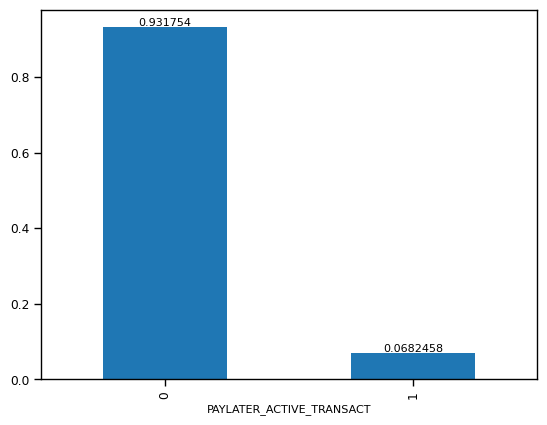

In [ ]:
# Training
ax = training['PAYLATER_ACTIVE_TRANSACT'].value_counts(normalize=True).plot(kind='bar')
ax.bar_label(ax.containers[0])

As we found on the Data Manipulation process, that only 6% of the population taking the loan

[Text(0, 0, '0.934021'), Text(0, 0, '0.0659793')]

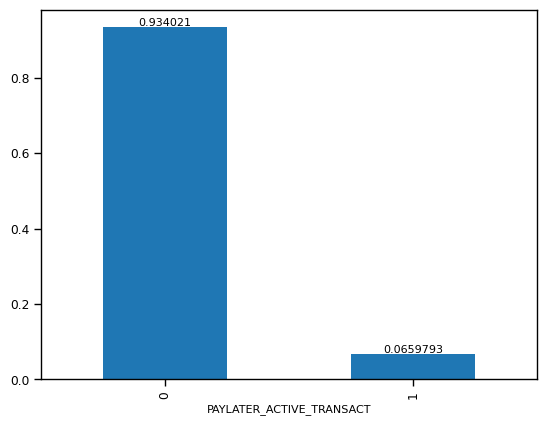

In [ ]:
# Test
ax = test['PAYLATER_ACTIVE_TRANSACT'].value_counts(normalize=True).plot(kind='bar')
ax.bar_label(ax.containers[0])

### Feature check using boxplots & heatmaps

We want to check whether some variables exhibits different behaviours on target=1 and target=0

In [ ]:
binary_columns = training.columns[training.isin([0,1]).all(axis=0)]
binary_columns = list(set(binary_columns) - set(['target']))
binary_columns

['FLAG_FEMALE',
 'CUST_VALUE_GROUP_E',
 'HOMEOWNER_STATUS',
 'MAPP_ACTIVE_GROUP_Y',
 'PAYLATER_ACTIVE_TRANSACT',
 'PROMO_SENSITIVE_L6M',
 'MAPP_ACTIVE_GROUP_Z',
 'CUST_VALUE_GROUP_C',
 'CUST_VALUE_GROUP_B',
 'PROMO_SENSITIVE_LTM',
 'CUST_VALUE_GROUP_D',
 'PROMO_CHANNEL']

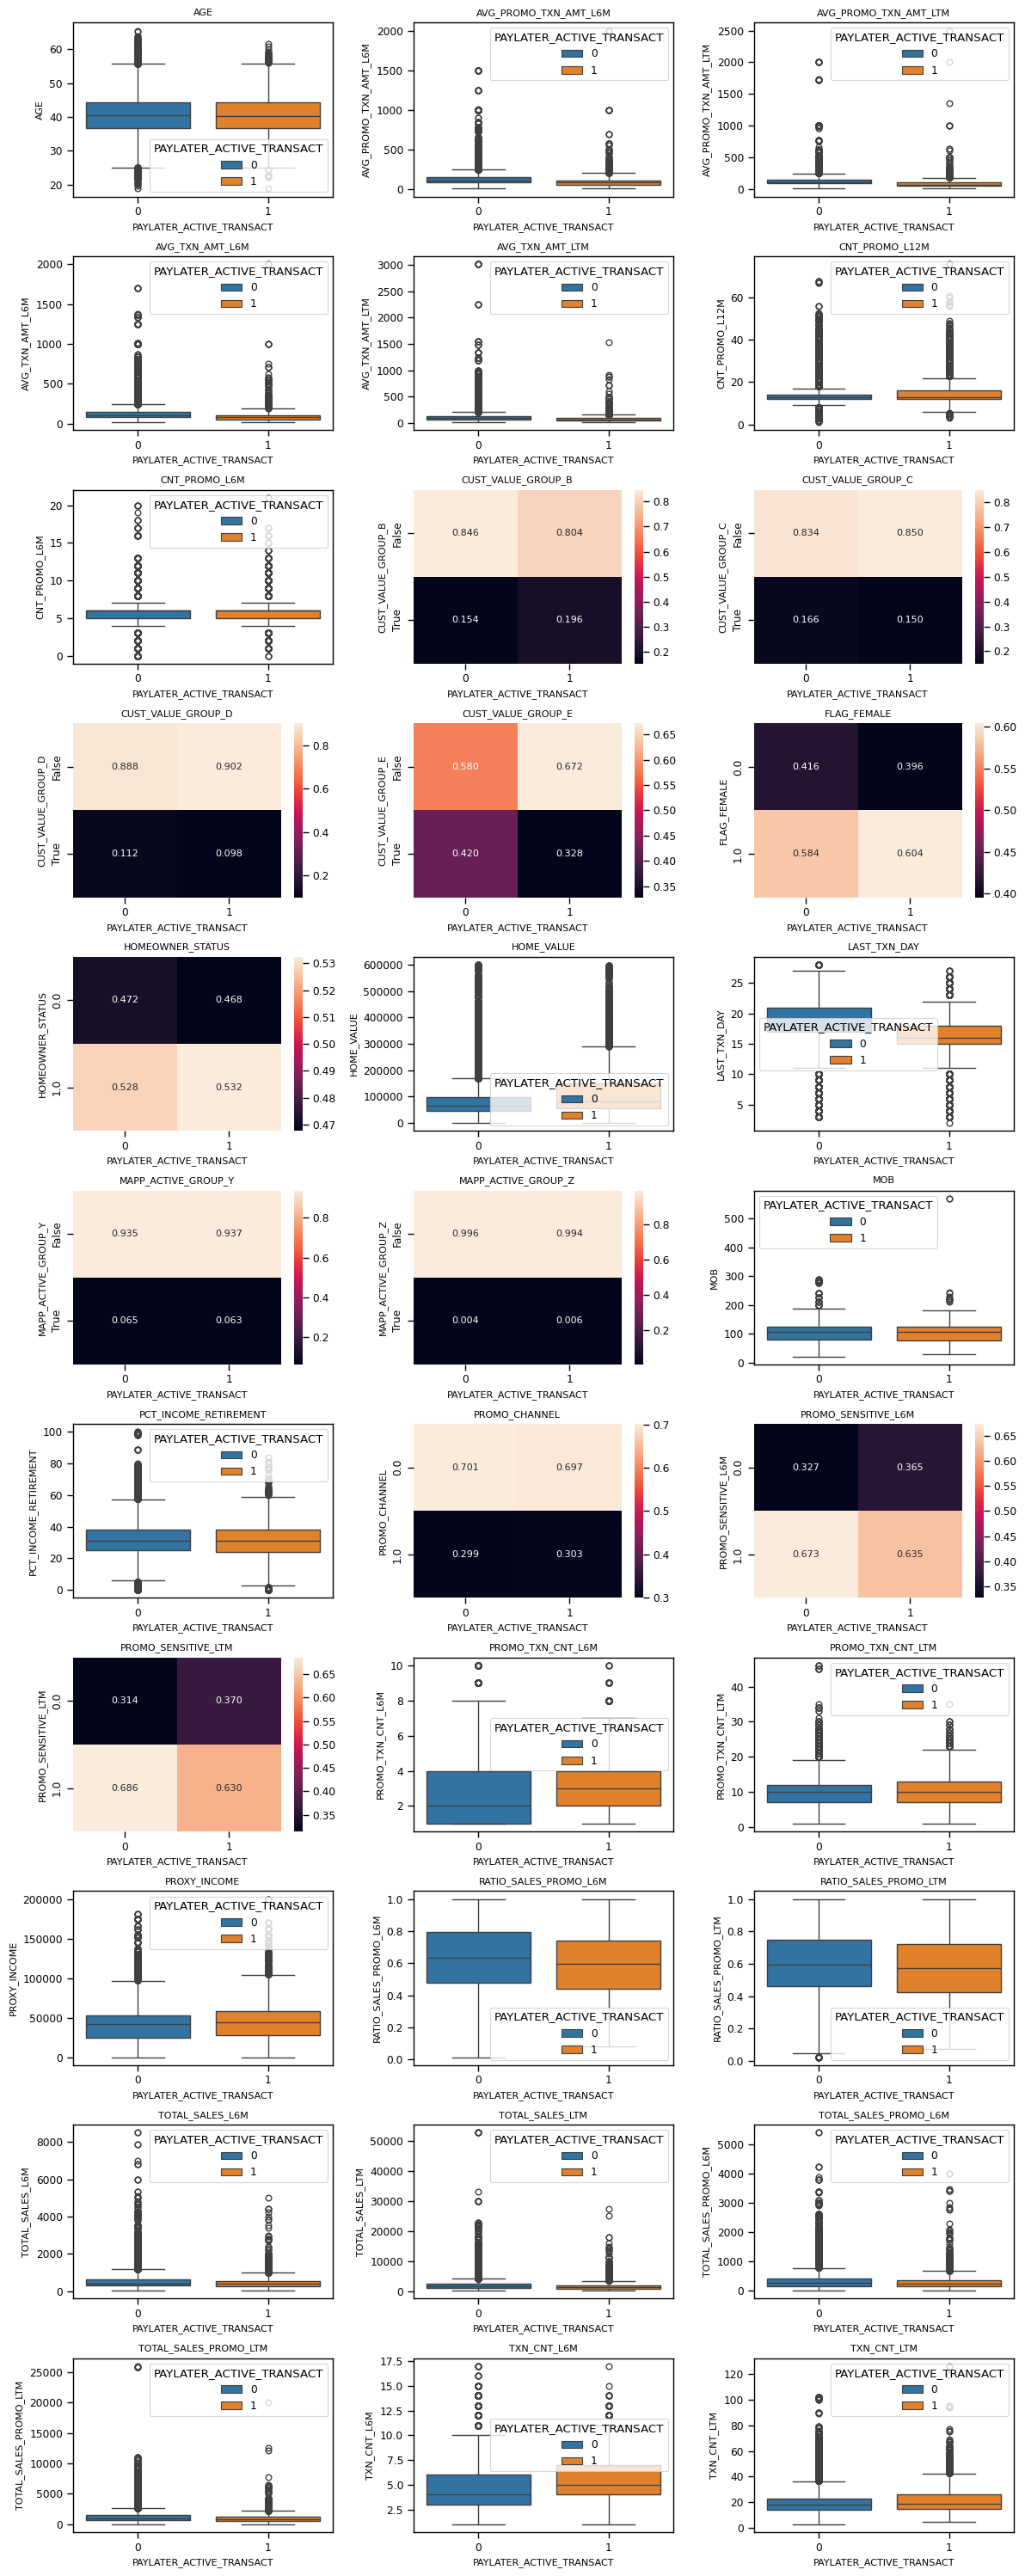

In [ ]:
# First, we create the figure and axis
fig, axes = plt.subplots(11,3, figsize = (12,30))

# Get smaller font size
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8})

for col, ax in zip(training.columns,axes.flatten()):
  if col in binary_columns:
    # Calculate value counts with a specified name for the count column
    data = training[['PAYLATER_ACTIVE_TRANSACT',col]].groupby('PAYLATER_ACTIVE_TRANSACT').value_counts(normalize=True).rename('value').reset_index()

    # Pivot the data using the correct column names
    data = data.pivot(columns = 'PAYLATER_ACTIVE_TRANSACT', index=col, values='value')

    sns.heatmap(data, annot=True, fmt=",.3f", ax=ax)
  else:
    sns.boxplot(data=training, x='PAYLATER_ACTIVE_TRANSACT', y=col, hue='PAYLATER_ACTIVE_TRANSACT', ax=ax)

  ax.set_title(col)

plt.tight_layout()

### Variable removal using Correlation

Typically, we want to build a parsimonious model. A parsimonious model is a model that accomplishes the desired level of explanation or prediction with as few predictor variables as possible.

We now have 33 number of variables, excluding the target variables. To check whether we can reduce the number of variables, we can use correlation check. Another potential method is to use data reduction methods (e.g. PCA) or regularization, but this is beyond the scope of today's exercise.

In [ ]:
# Check correlation of features
corr_column = training.select_dtypes(include=[np.number]).columns.to_list()
corr_column

['AGE',
 'AVG_PROMO_TXN_AMT_L6M',
 'AVG_PROMO_TXN_AMT_LTM',
 'AVG_TXN_AMT_L6M',
 'AVG_TXN_AMT_LTM',
 'CNT_PROMO_L12M',
 'CNT_PROMO_L6M',
 'FLAG_FEMALE',
 'HOMEOWNER_STATUS',
 'HOME_VALUE',
 'LAST_TXN_DAY',
 'MOB',
 'PCT_INCOME_RETIREMENT',
 'PROMO_CHANNEL',
 'PROMO_SENSITIVE_L6M',
 'PROMO_SENSITIVE_LTM',
 'PROMO_TXN_CNT_L6M',
 'PROMO_TXN_CNT_LTM',
 'PROXY_INCOME',
 'RATIO_SALES_PROMO_L6M',
 'RATIO_SALES_PROMO_LTM',
 'TOTAL_SALES_L6M',
 'TOTAL_SALES_LTM',
 'TOTAL_SALES_PROMO_L6M',
 'TOTAL_SALES_PROMO_LTM',
 'TXN_CNT_L6M',
 'TXN_CNT_LTM',
 'PAYLATER_ACTIVE_TRANSACT']

In [ ]:
# Calculate the correlation matrix
corr_matrix = training[corr_column].corr()

# Extract upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns that have correlation above 0.5 (in absolute terms)
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > 0.5)]

# Print the result
high_corr_columns

['AVG_PROMO_TXN_AMT_LTM',
 'AVG_TXN_AMT_L6M',
 'AVG_TXN_AMT_LTM',
 'CNT_PROMO_L6M',
 'PROXY_INCOME',
 'RATIO_SALES_PROMO_L6M',
 'RATIO_SALES_PROMO_LTM',
 'TOTAL_SALES_L6M',
 'TOTAL_SALES_LTM',
 'TOTAL_SALES_PROMO_L6M',
 'TOTAL_SALES_PROMO_LTM',
 'TXN_CNT_L6M',
 'TXN_CNT_LTM']

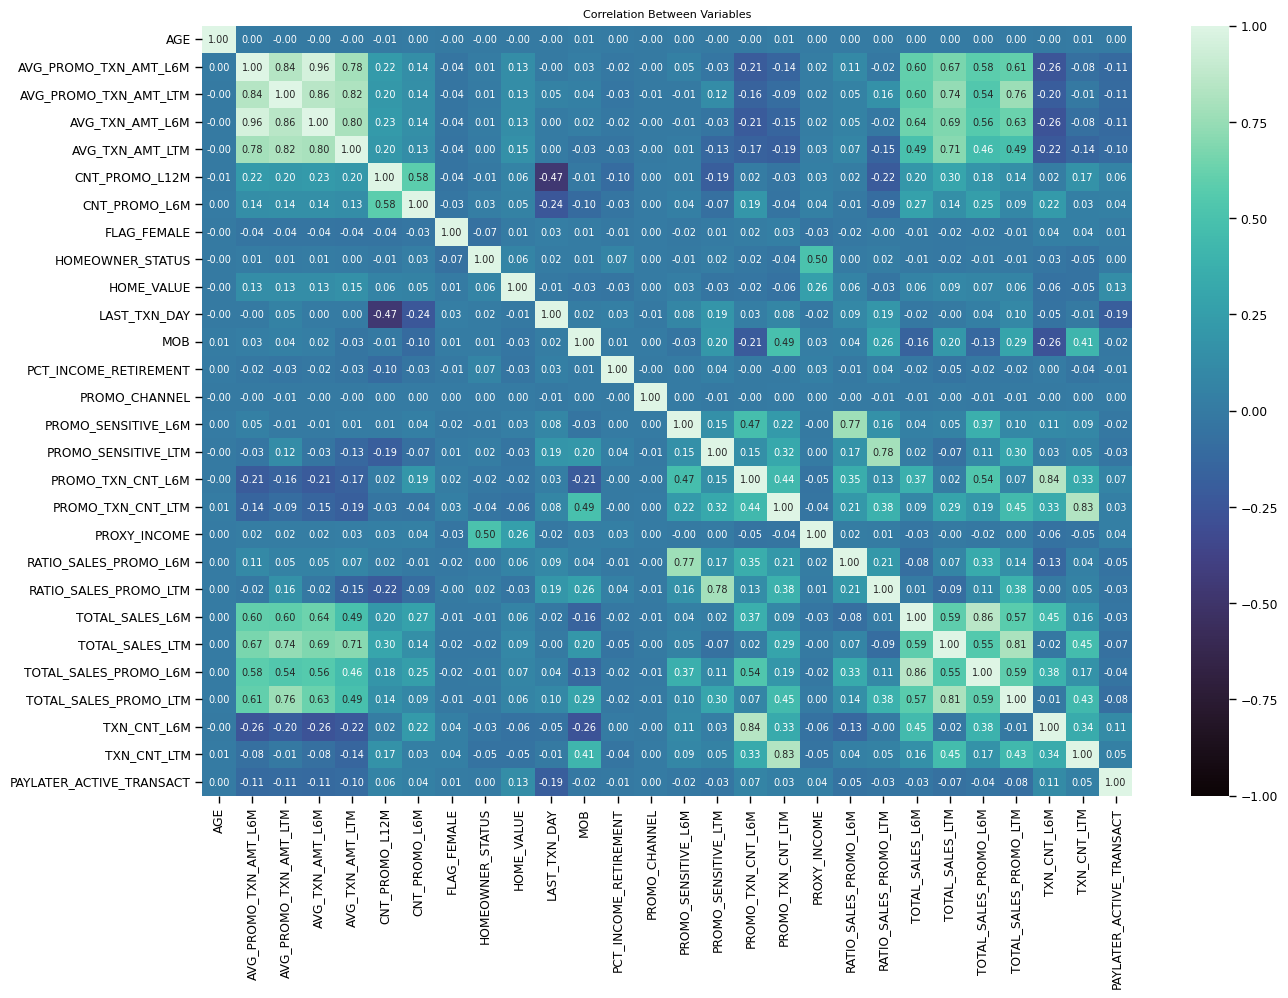

In [ ]:
# Plot heatmap
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variables')

sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='mako', annot=True,
            annot_kws={"fontsize":7}, fmt=",.2f")
plt.show()

We will remove variables that has high correlation number

In [ ]:
high_corr_columns = list(set(high_corr_columns))
high_corr_columns

['RATIO_SALES_PROMO_L6M',
 'RATIO_SALES_PROMO_LTM',
 'TOTAL_SALES_PROMO_L6M',
 'TXN_CNT_LTM',
 'AVG_TXN_AMT_LTM',
 'AVG_PROMO_TXN_AMT_LTM',
 'TOTAL_SALES_LTM',
 'TOTAL_SALES_L6M',
 'TXN_CNT_L6M',
 'AVG_TXN_AMT_L6M',
 'TOTAL_SALES_PROMO_LTM',
 'CNT_PROMO_L6M',
 'PROXY_INCOME']

In [ ]:
x_training = x_training.drop(high_corr_columns, axis=1)
x_test = x_test.drop(high_corr_columns, axis=1)

In [ ]:
# Check correlation of features
corr_column = x_training.select_dtypes(include=[np.number]).columns.to_list()
corr_column

['AGE',
 'AVG_PROMO_TXN_AMT_L6M',
 'CNT_PROMO_L12M',
 'FLAG_FEMALE',
 'HOMEOWNER_STATUS',
 'HOME_VALUE',
 'LAST_TXN_DAY',
 'MOB',
 'PCT_INCOME_RETIREMENT',
 'PROMO_CHANNEL',
 'PROMO_SENSITIVE_L6M',
 'PROMO_SENSITIVE_LTM',
 'PROMO_TXN_CNT_L6M',
 'PROMO_TXN_CNT_LTM']

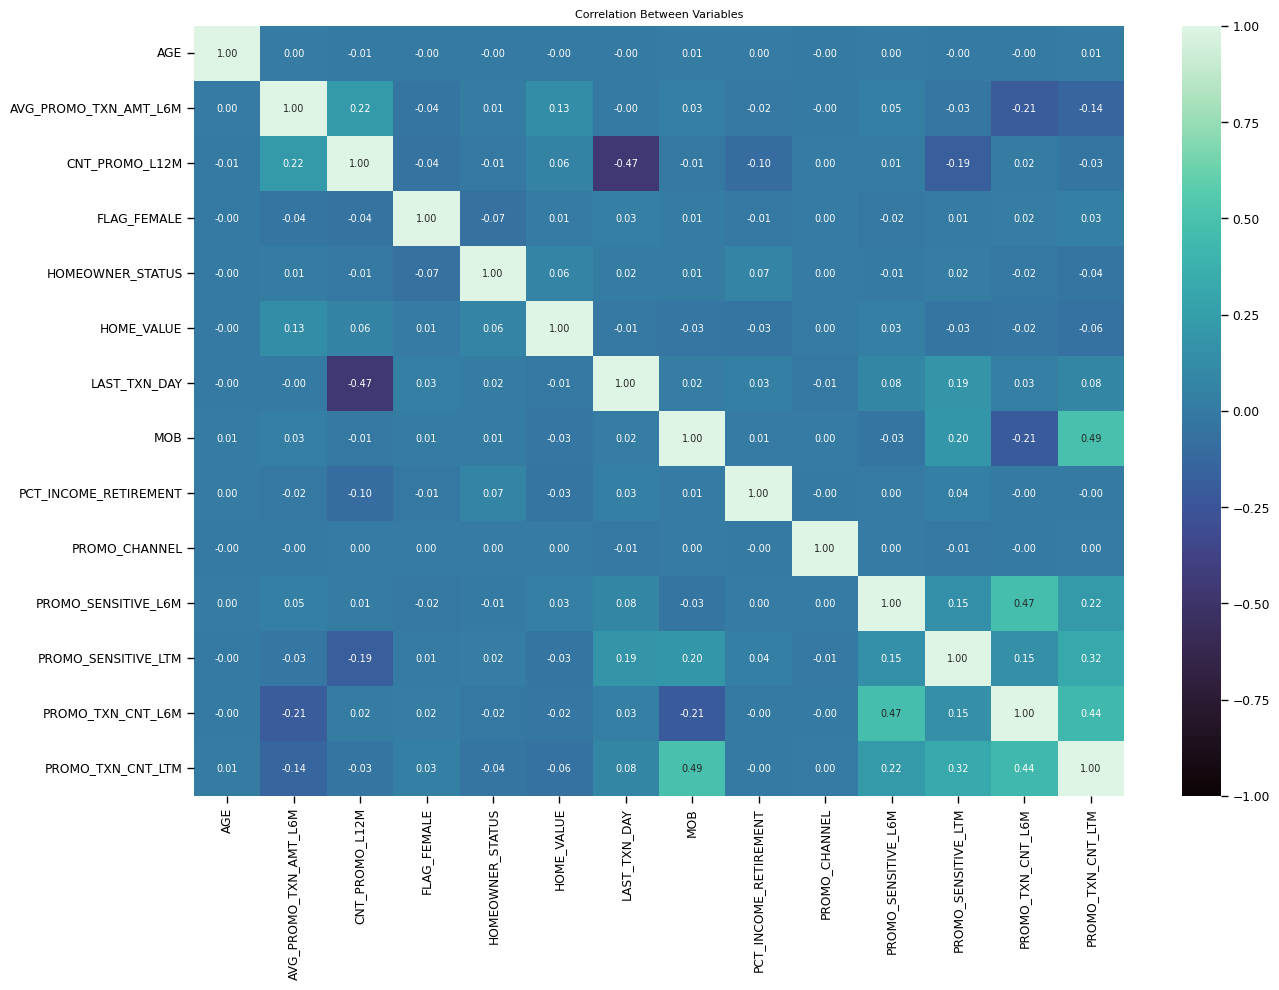

In [ ]:
# Plot heatmap
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Variables')

sns.heatmap(training[corr_column].corr(),vmin=-1,
            vmax=1,cmap='mako',annot=True,
            annot_kws={"fontsize":7}, fmt=",.2f")
plt.show()

## Fit Logistic Regression Model

In [ ]:
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(x_training, y_training['PAYLATER_ACTIVE_TRANSACT'].ravel())

LogisticRegression(class_weight='balanced', max_iter=500)

## Model Evaluation

### Probability & Prediction of the Model

Use the model to generate probability to take the loan & prediction of the model

In [ ]:
x_training2 = x_training.copy()
x_training2['prediction'] = model.predict(x_training)
x_training2[['prob_no','prob_takers']] = model.predict_proba(x_training)
x_training2[['prob_takers','prediction']]

,prob_takers,prediction
ACCOUNT_ID,,
100689712,0.927412,1
100665006,0.247552,0
100222052,0.562398,1
100209146,0.334703,0
100715614,0.155685,0
...,...,...
100034094,0.637003,1
100354876,0.552465,1
100733706,0.445855,0


In [ ]:
x_test2 = x_test.copy()
x_test2['prediction'] = model.predict(x_test)
x_test2[['prob_no','prob_takers']] = model.predict_proba(x_test)
x_test2[['prob_takers','prediction']]

,prob_takers,prediction
ACCOUNT_ID,,
100976909,0.342903,0
101058363,0.667993,1
100078536,0.063565,0
100050082,0.070898,0
100451094,0.169803,0
...,...,...
100787126,0.372379,0
100446509,0.747185,1
100483784,0.600289,1


### Accuracy

Accuracy on the model can be checked using .score()

In [ ]:
# Accuracy from prediction model with training data
model.score(x_training, y_training)

0.7270169851380043

In [ ]:
# Accuracy from prediction model with test data
model.score(x_test, y_test)

0.73137655582389

### Confusion Matrix

We can also check the confusion matrix using the confusion_matrix() report to oversee each class predicted

In [ ]:
# train
confusion_train = confusion_matrix(y_training, model.predict(x_training))
confusion_train

array([[51239, 18978],
       [ 1594,  3549]])

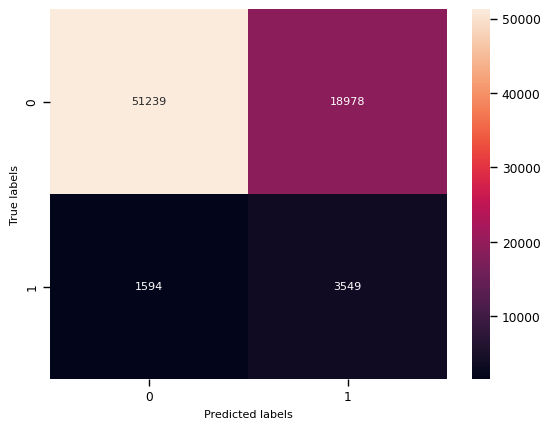

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_train, annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

In [ ]:
# test
confusion_test = confusion_matrix(y_test, model.predict(x_test))
confusion_test

array([[22129,  8038],
       [  638,  1493]])

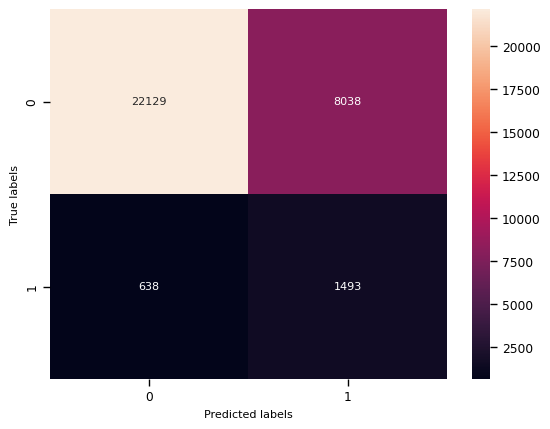

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_test, annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');

### Classification Report

In [ ]:
print(classification_report(y_training, model.predict(x_training)))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     70217
           1       0.16      0.69      0.26      5143

    accuracy                           0.73     75360
   macro avg       0.56      0.71      0.54     75360
weighted avg       0.91      0.73      0.79     75360



In [ ]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84     30167
           1       0.16      0.70      0.26      2131

    accuracy                           0.73     32298
   macro avg       0.56      0.72      0.55     32298
weighted avg       0.92      0.73      0.80     32298



We can understood that from this model's classification report, we can conlude that the model is better at predicting non-promising Paylater customer, rather than predicting more-promising paylater customer

### ROC Curve

In [ ]:
# Create holder variable for the FPR, TPR, and AUC-ROC data

# Training
fpr_train = dict()
tpr_train = dict()
auc_roc_train = dict()

# Test
fpr_test = dict()
tpr_test = dict()
auc_roc_test = dict()

In [ ]:
# Create score from model
y_train_score = model.predict_proba(x_training)[:,1]
y_test_score = model.predict_proba(x_test)[:,1]

In [ ]:
# Compute micro-average ROC curve and ROC area

# Train
fpr_train["micro"], tpr_train["micro"], _ = roc_curve(y_training['PAYLATER_ACTIVE_TRANSACT'], y_train_score.ravel())
auc_roc_train["micro"] = auc(fpr_train["micro"], tpr_train["micro"])

# Test
fpr_test["micro"], tpr_test["micro"], _ = roc_curve(y_test['PAYLATER_ACTIVE_TRANSACT'], y_test_score.ravel())
auc_roc_test["micro"] = auc(fpr_test["micro"], tpr_test["micro"])

In [ ]:
auc_roc_train["micro"]

0.7843972704365917

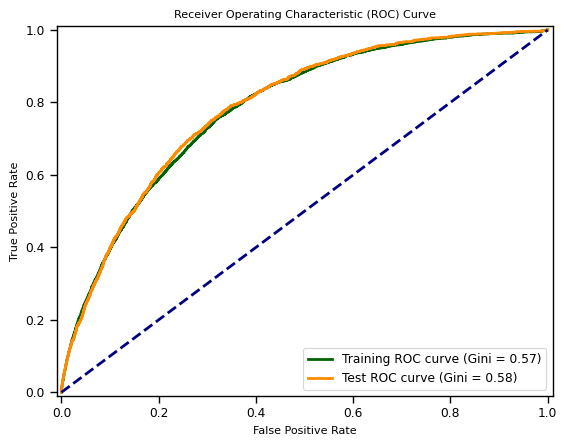

In [ ]:
# Create ROC-AUC Curve for training and test
plt.figure()
lw = 2
# Training
plt.plot(
    fpr_train["micro"],
    tpr_train["micro"],
    color = "darkgreen",
    lw=lw,
    label="Training ROC curve (Gini = %0.2f)" % (2*(auc_roc_train["micro"] - .5)),
)

# Testing
plt.plot(
    fpr_test["micro"],
    tpr_test["micro"],
    color = "darkorange",
    lw=lw,
    label="Test ROC curve (Gini = %0.2f)" % (2*(auc_roc_test["micro"] - .5)),
)
plt.plot([0,1],[0,1], color="navy", lw=lw, linestyle = '--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc = "lower right")
plt.show()

Based on this evaluation, our model has moderate ability to distinguish between promising & non-promising class. And while it is not over-fitting, with the given AUC is closer to 0.8, we can trust this model

### Decile Performance

#### Training Dataset

In [ ]:
# Create a prediction table for training set
x_training2 = x_training.copy()
x_training2['prediction'] = model.predict(x_training)
x_training2[['prob_no','prob_takers']] = model.predict_proba(x_training)
x_training2 = x_training2[['prob_takers','prediction']].copy()
x_training2

,prob_takers,prediction
ACCOUNT_ID,,
100689712,0.927412,1
100665006,0.247552,0
100222052,0.562398,1
100209146,0.334703,0
100715614,0.155685,0
...,...,...
100034094,0.637003,1
100354876,0.552465,1
100733706,0.445855,0


In [ ]:
x_training2 = x_training2.merge(y_training, how='inner', left_index=True, right_index=True)
x_training2

,prob_takers,prediction,PAYLATER_ACTIVE_TRANSACT
ACCOUNT_ID,,,
100689712,0.927412,1,0
100665006,0.247552,0,0
100222052,0.562398,1,0
100209146,0.334703,0,1
100715614,0.155685,0,0
...,...,...,...
100034094,0.637003,1,0
100354876,0.552465,1,0
100733706,0.445855,0,0


In [ ]:
# Create 10 decile
x_training2['binning'] = pd.qcut(x_training2['prob_takers'], q=10, precision=5)

# Create proposition table
df_prop = x_training2.drop(['prob_takers','prediction'], axis=1).value_counts().sort_index(ascending = False).reset_index()
df_prop = df_prop.pivot(index = 'binning', columns = 'PAYLATER_ACTIVE_TRANSACT', values = 'count').fillna(0)

df_prop['total_obs'] = df_prop.sum(axis=1)
df_prop['prob_takers'] = df_prop[1]/df_prop['total_obs']
n_good = df_prop[df_prop.columns[0]].sum(axis=0)
n_bad = df_prop[df_prop.columns[1]].sum(axis=0)
df_prop['pct_non_takers'] = df_prop[df_prop.columns[0]] / n_good
df_prop['pct_takers'] = df_prop[df_prop.columns[1]] / n_bad
df_prop['cumm_non_takers'] = df_prop['pct_non_takers'].cumsum()
df_prop['cumm_takers'] = df_prop['pct_takers'].cumsum()
df_prop = df_prop.rename(columns = {0: '#non-takers', 1: '#takers'})

In [ ]:
df_prop

PAYLATER_ACTIVE_TRANSACT,#non-takers,#takers,total_obs,prob_takers,pct_non_takers,pct_takers,cumm_non_takers,cumm_takers
binning,,,,,,,,
"(-9.9969262e-06, 0.1284]",7486,50,7536,0.006635,0.106612,0.009722,0.106612,0.009722
"(0.1284, 0.1969]",7470,66,7536,0.008758,0.106384,0.012833,0.212997,0.022555
"(0.1969, 0.25851]",7430,106,7536,0.014066,0.105815,0.020611,0.318812,0.043165
"(0.25851, 0.31768]",7361,175,7536,0.023222,0.104832,0.034027,0.423644,0.077192
"(0.31768, 0.37698]",7250,286,7536,0.037951,0.103251,0.055610,0.526895,0.132802
"(0.37698, 0.43657]",7182,354,7536,0.046975,0.102283,0.068831,0.629178,0.201633
"(0.43657, 0.49938]",6987,549,7536,0.072850,0.099506,0.106747,0.728684,0.308380
"(0.49938, 0.57694]",6810,726,7536,0.096338,0.096985,0.141163,0.825669,0.449543
"(0.57694, 0.69188]",6490,1046,7536,0.138800,0.092428,0.203383,0.918097,0.652926


#### Testing dataset

In [ ]:
# Create a prediction table for test set
x_test2 = x_test.copy()
x_test2['prediction'] = model.predict(x_test)
x_test2[['prob_no','prob_takers']] = model.predict_proba(x_test)
x_test2 = x_test2[['prob_takers','prediction']].copy()
x_test2

,prob_takers,prediction
ACCOUNT_ID,,
100976909,0.342903,0
101058363,0.667993,1
100078536,0.063565,0
100050082,0.070898,0
100451094,0.169803,0
...,...,...
100787126,0.372379,0
100446509,0.747185,1
100483784,0.600289,1


In [ ]:
x_test2 = x_test2.merge(y_test, how='inner', left_index=True, right_index=True)
x_test2

,prob_takers,prediction,PAYLATER_ACTIVE_TRANSACT
ACCOUNT_ID,,,
100976909,0.342903,0,0
101058363,0.667993,1,0
100078536,0.063565,0,0
100050082,0.070898,0,0
100451094,0.169803,0,0
...,...,...,...
100787126,0.372379,0,0
100446509,0.747185,1,0
100483784,0.600289,1,0


In [ ]:
# Create 10 decile
x_test2['binning'] = pd.qcut(x_test2['prob_takers'], q=10, precision=5)

# Create proposition table
df_prop = x_test2.drop(['prob_takers','prediction'], axis=1).value_counts().sort_index(ascending = False).reset_index()
df_prop = df_prop.pivot(index = 'binning', columns = 'PAYLATER_ACTIVE_TRANSACT', values = 'count').fillna(0)

df_prop['total_obs'] = df_prop.sum(axis=1)
df_prop['prob_takers'] = df_prop[1]/df_prop['total_obs']
n_good = df_prop[df_prop.columns[0]].sum(axis=0)
n_bad = df_prop[df_prop.columns[1]].sum(axis=0)
df_prop['pct_non_takers'] = df_prop[df_prop.columns[0]] / n_good
df_prop['pct_takers'] = df_prop[df_prop.columns[1]] / n_bad
df_prop['cumm_non_takers'] = df_prop['pct_non_takers'].cumsum()
df_prop['cumm_takers'] = df_prop['pct_takers'].cumsum()
df_prop = df_prop.rename(columns = {0: '#non-takers', 1: '#takers'})

In [ ]:
df_prop

PAYLATER_ACTIVE_TRANSACT,#non-takers,#takers,total_obs,prob_takers,pct_non_takers,pct_takers,cumm_non_takers,cumm_takers
binning,,,,,,,,
"(-9.68387e-06, 0.12818]",3211,19,3230,0.005882,0.106441,0.008916,0.106441,0.008916
"(0.12818, 0.19431]",3206,24,3230,0.007430,0.106275,0.011262,0.212716,0.020178
"(0.19431, 0.25605]",3188,42,3230,0.013003,0.105678,0.019709,0.318394,0.039887
"(0.25605, 0.31719]",3158,71,3229,0.021988,0.104684,0.033318,0.423078,0.073205
"(0.31719, 0.3749]",3115,115,3230,0.035604,0.103259,0.053965,0.526337,0.127170
"(0.3749, 0.43159]",3078,152,3230,0.047059,0.102032,0.071328,0.628369,0.198498
"(0.43159, 0.49669]",3029,200,3229,0.061939,0.100408,0.093853,0.728776,0.292351
"(0.49669, 0.575]",2905,325,3230,0.100619,0.096297,0.152511,0.825074,0.444862
"(0.575, 0.69272]",2777,453,3230,0.140248,0.092054,0.212576,0.917128,0.657438


## Generating 30,000 base

In [ ]:
# Since we don't have fresh customers to get the base, we will use again the totality of the current customers that we have
clients = pd.concat([x_test2,x_training2])
clients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107658 entries, 100976909 to 100017644
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype                   
---  ------                    --------------   -----                   
 0   prob_takers               107658 non-null  float64                 
 1   prediction                107658 non-null  int64                   
 2   PAYLATER_ACTIVE_TRANSACT  107658 non-null  int64                   
 3   binning                   107658 non-null  interval[float64, right]
dtypes: float64(1), int64(2), interval(1)
memory usage: 4.9 MB


In [ ]:
# Only use clients who never use Paylayer (PAYLATER_ACTIVE_TRANSACT = 0)
clients2 = clients[clients['PAYLATER_ACTIVE_TRANSACT'] == 0].copy()
clients2

,prob_takers,prediction,PAYLATER_ACTIVE_TRANSACT,binning
ACCOUNT_ID,,,,
100976909,0.342903,0,0,"(0.31719, 0.3749]"
101058363,0.667993,1,0,"(0.575, 0.69272]"
100078536,0.063565,0,0,"(-9.68387e-06, 0.12818]"
100050082,0.070898,0,0,"(-9.68387e-06, 0.12818]"
100451094,0.169803,0,0,"(0.12818, 0.19431]"
...,...,...,...,...
100034094,0.637003,1,0,"(0.57694, 0.69188]"
100354876,0.552465,1,0,"(0.49938, 0.57694]"
100733706,0.445855,0,0,"(0.43657, 0.49938]"


In [ ]:
# Sort by top probability
clients_base = clients2.sort_values(by=['prob_takers'], ascending=False)
clients_base = clients_base.head(30000)
clients_base

,prob_takers,prediction,PAYLATER_ACTIVE_TRANSACT,binning
ACCOUNT_ID,,,,
100298342,0.996640,1,0,"(0.69188, 0.99876]"
100587443,0.995629,1,0,"(0.69188, 0.99876]"
100303874,0.995498,1,0,"(0.69188, 0.99876]"
100394709,0.995165,1,0,"(0.69188, 0.99876]"
100491076,0.994966,1,0,"(0.69272, 0.99881]"
...,...,...,...,...
100403168,0.480154,0,0,"(0.43657, 0.49938]"
100628083,0.480150,0,0,"(0.43657, 0.49938]"
100697915,0.480140,0,0,"(0.43159, 0.49669]"


In [ ]:
# Calculate average probability
clients_base['prob_takers'].mean()

0.6325251067907717